In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sglm.models import sglm_cv


In [3]:
import time
import glob
import numpy as np
import pandas as pd
import numpy as np
from sglm.features import gen_signal_df as gsd
from sglm.features import build_features as bf
from sglm.features import setup_model_fit as smf
from sglm.models import sglm_cv
from sglm import models
from sglm.visualization import visualize
from sglm.models import train_model
from sglm.models import eval
from sglm import features

neg_order = -20
pos_order = 20
# multifile_fit = False
multifile_fit = True

wt_used = ['WT61', 'WT63', 'WT64']

# X_y_pairings = [
#     {'X_cols': {'nTrial': (0,0),
#                 'cpn': (0,0),
#                 'cpx': (0,0),
#                 'spnr': (0,0),
#                 'spxr': (0,0),
#                 'spnnr': (0,0),
#                 'spxnr': (0,0),
#                 'sl': (0,0),
#                 # 'Ch6': (0,0)
#                },
#      'y_col': 'gACH'},
#     {'X_cols': {'nTrial': (0,0),
#                 'cpn': (0,0),
#                 'cpx': (0,0),
#                 'spnr': (0,0),
#                 'spxr': (0,0),
#                 'spnnr': (0,0),
#                 'spxnr': (0,0),
#                 'sl': (0,0),
#                 # 'Ch6': (0,0)
#                },
#      'y_col': 'gDA'},
#     {'X_cols': {'nTrial': (0,0),
#                 'cpn': (0,0),
#                 'cpx': (0,0),
#                 'spnr': (0,0),
#                 'spxr': (0,0),
#                 'spnnr': (0,0),
#                 'spxnr': (0,0),
#                 'sl': (0,0),
#                 # 'Ch6': (0,0)
#                },
#      'y_col': 'Ch5'},
#     {'X_cols': {'nTrial': (0,0),
#                 'cpn': (0,0),
#                 'cpx': (0,0),
#                 'spnr': (0,0),
#                 'spxr': (0,0),
#                 'spnnr': (0,0),
#                 'spxnr': (0,0),
#                 'sl': (0,0),
#                 # 'Ch5': (0,0)
#                },
#      'y_col': 'Ch6'},
# ]

X_y_pairings = [
    {'X_cols': {'nTrial': (0,0),
                'cpn': (0,0),
                'cpx': (0,0),
                'spnrOff': (0,0),
                'spxrOff': (0,0),
                'spnnrOff': (0,0),
                'spxnrOff': (0,0),

                'photometrySideInIndexAA':(0,0), 'photometrySideInIndexAa':(0,0),
                'photometrySideInIndexaA':(0,0), 'photometrySideInIndexaa':(0,0),
                'photometrySideInIndexAB':(0,0), 'photometrySideInIndexAb':(0,0),
                'photometrySideInIndexaB':(0,0), 'photometrySideInIndexab':(0,0),

                'photometrySideOutIndexAA':(0,0), 'photometrySideOutIndexAa':(0,0),
                'photometrySideOutIndexaA':(0,0), 'photometrySideOutIndexaa':(0,0),
                'photometrySideOutIndexAB':(0,0), 'photometrySideOutIndexAb':(0,0),
                'photometrySideOutIndexaB':(0,0), 'photometrySideOutIndexab':(0,0),

                'sl': (0,0),
                # 'Ch6': (0,0)
               },
     'y_col': 'gACH'},
    {'X_cols': {'nTrial': (0,0),
                'cpn': (0,0),
                'cpx': (0,0),
                'spnrOff': (0,0),
                'spxrOff': (0,0),
                'spnnrOff': (0,0),
                'spxnrOff': (0,0),

                'photometrySideInIndexAA':(0,0), 'photometrySideInIndexAa':(0,0),
                'photometrySideInIndexaA':(0,0), 'photometrySideInIndexaa':(0,0),
                'photometrySideInIndexAB':(0,0), 'photometrySideInIndexAb':(0,0),
                'photometrySideInIndexaB':(0,0), 'photometrySideInIndexab':(0,0),

                'photometrySideOutIndexAA':(0,0), 'photometrySideOutIndexAa':(0,0),
                'photometrySideOutIndexaA':(0,0), 'photometrySideOutIndexaa':(0,0),
                'photometrySideOutIndexAB':(0,0), 'photometrySideOutIndexAb':(0,0),
                'photometrySideOutIndexaB':(0,0), 'photometrySideOutIndexab':(0,0),

                'sl': (0,0),
                # 'Ch6': (0,0)
               },
     'y_col': 'gDA'},
    {'X_cols': {'nTrial': (0,0),
                'cpn': (0,0),
                'cpx': (0,0),
                'spnrOff': (0,0),
                'spxrOff': (0,0),
                'spnnrOff': (0,0),
                'spxnrOff': (0,0),


                'photometrySideInIndexAA':(0,0), 'photometrySideInIndexAa':(0,0),
                'photometrySideInIndexaA':(0,0), 'photometrySideInIndexaa':(0,0),
                'photometrySideInIndexAB':(0,0), 'photometrySideInIndexAb':(0,0),
                'photometrySideInIndexaB':(0,0), 'photometrySideInIndexab':(0,0),

                'photometrySideOutIndexAA':(0,0), 'photometrySideOutIndexAa':(0,0),
                'photometrySideOutIndexaA':(0,0), 'photometrySideOutIndexaa':(0,0),
                'photometrySideOutIndexAB':(0,0), 'photometrySideOutIndexAb':(0,0),
                'photometrySideOutIndexaB':(0,0), 'photometrySideOutIndexab':(0,0),

                'sl': (0,0),
                # 'Ch6': (0,0)
               },
     'y_col': 'Ch5'},
    {'X_cols': {'nTrial': (0,0),
                'cpn': (0,0),
                'cpx': (0,0),
                'spnrOff': (0,0),
                'spxrOff': (0,0),
                'spnnrOff': (0,0),
                'spxnrOff': (0,0),


                'photometrySideInIndexAA':(0,0), 'photometrySideInIndexAa':(0,0),
                'photometrySideInIndexaA':(0,0), 'photometrySideInIndexaa':(0,0),
                'photometrySideInIndexAB':(0,0), 'photometrySideInIndexAb':(0,0),
                'photometrySideInIndexaB':(0,0), 'photometrySideInIndexab':(0,0),

                'photometrySideOutIndexAA':(0,0), 'photometrySideOutIndexAa':(0,0),
                'photometrySideOutIndexaA':(0,0), 'photometrySideOutIndexaa':(0,0),
                'photometrySideOutIndexAB':(0,0), 'photometrySideOutIndexAb':(0,0),
                'photometrySideOutIndexaB':(0,0), 'photometrySideOutIndexab':(0,0),

                'sl': (0,0),
                # 'Ch5': (0,0)
               },
     'y_col': 'Ch6'},
]

widest_orders = smf.xy_pairs_to_widest_orders(X_y_pairings)
widest_orders = smf.X_cols_dict_to_default(widest_orders, neg_order, pos_order)


# Load Signal Data
signal_files = []
for wt in wt_used:
    signal_files += glob.glob(f'../../data/interim/GLM_SIGNALS_INTERIM_{wt}_*')
    
if multifile_fit:
    combo_dfs, X_cols_sftd, _ = smf.multi_file_analysis_prep(signal_files, widest_orders)
    combo_fns = ['_'.join(wt_used)]
else:
    combo_dfs, X_cols_sftd, combo_fns = smf.single_file_analysis_prep(signal_files, widest_orders)


In [4]:
# def X_cols_dict_to_default(X_cols_dict, neg_order=-20, pos_order=20):
#     X_cols_dict = X_cols_dict.copy()
#     for X_col in X_cols_dict:
#         if X_cols_dict[X_col] == (0,0) or X_cols_dict[X_col] is None:
#             X_cols_dict[X_col] = (neg_order, pos_order)
#     return X_cols_dict

# X_cols_dict = {
#     'Ch5': (-5, 5),
#     'Ch6': (-5, 10),
#     'GP_1': (-10, 5),
#     'GP_2': (-5, 0),
#     'GP_5': (0, 0),
# }
# X_cols_dict = X_cols_dict_to_default(X_cols_dict, neg_order, pos_order)
# smf.timeshift_vals_by_dict(combo_dfs[0][['gACH',	'rDA',	'Ch5',	'Ch6',	'GP_1',	'GP_2',	'GP_5',	'GP_6',	'SGP_1',	'SGP_2']], X_cols_dict).columns

In [5]:
# y_col_lst = ['gACH', 'gDA', 'Ch5', 'Ch6']

drop_cols_basis = [
    'nTrial',
    'cpn', 'cpx',
    'spnnr',
    'spxnr',
    'spnr', 'spxr',


    'photometrySideInIndexAA', 'photometrySideInIndexAa',
    'photometrySideInIndexaA', 'photometrySideInIndexaa',
    'photometrySideInIndexAB', 'photometrySideInIndexAb',
    'photometrySideInIndexaB', 'photometrySideInIndexab',

    'photometrySideOutIndexAA', 'photometrySideOutIndexAa',
    'photometrySideOutIndexaA', 'photometrySideOutIndexaa',
    'photometrySideOutIndexAB', 'photometrySideOutIndexAb',
    'photometrySideOutIndexaB', 'photometrySideOutIndexab',


    'sl',
]

# prefix = 'combo-616364v-02'
# prefix = 'combo-616364-v04-addl-ys2'
# prefix = 'combo-616364-v05-words'
prefix = 'combo-616364-v06-words-fixed-spnrOff'


ssave_folder = '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/models/ssave'
all_models_folder = '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/models/all_models'
all_data_folder = '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/models/all_data'
all_reconstruct_folder = '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/figures/all_reconstruct'
all_coeffs_folder = '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/figures/all_coeffs'
best_reconstruct_folder = '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/figures/best_reconstruct'
best_coeffs_folder = '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/reports/figures/best_coeffs'

all_models_folder = '/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/models'

avg_reconstruct_basename = 'arr'
all_betas_basename = 'betas'
model_c_basename = 'coeffs'
model_i_basename = 'intercept'
tmp_data_basename = 'tmp_data'



score_method = 'r2'

# Select hyper parameters for GLM to use for model selection
# Step 1: Create a dictionary of lists for these relevant keywords...
kwargs_iterations = {
    'alpha': [0],
    'l1_ratio': [0],

    # 'alpha': [0.0, 0.001, 0.01, 0.1, 1.0],
    # 'l1_ratio': [0.0, 0.001],
}

# Step 2: Create a dictionary for the fixed keyword arguments that do not require iteration...
kwargs_fixed = {
    'max_iter': 1000,
    'fit_intercept': True
}

# neg_order, pos_order = -14, 14
folds = 50
pholdout = 0.2
pgss = 0.2

# Step 3: Generate iterable list of keyword sets for possible combinations
glm_kwarg_lst = sglm_cv.generate_mult_params(kwargs_iterations, kwargs_fixed)


In [6]:
# X_cols_basis = X_y_dct['X_cols']
# y_col = X_y_dct['y_col']
# fn = signal_fn.split('.')[0].split('/')[-1]
# run_id = f'{prefix}_{fn}_{y_col}_{iXyd}'

# X_cols_sftd_basis = bf.col_shift_bounds_dict_to_col_list(X_cols_basis, X_cols_sftd)
# dfrel

FINAL_WT61_WT63_WT64.csv
PCA fit in 23.445523023605347 seconds
> PCA-based Model fit in 19.98192000389099 seconds
> PCA GLM Built in 47.644309997558594 seconds
{'max_iter': 1000, 'fit_intercept': True, 'alpha': 0, 'l1_ratio': 0}
{'max_iter': 1000, 'fit_intercept': True, 'alpha': 0, 'l1_ratio': 0}
> cv_mean_score_train: 0.13214949158728995
> cv_R2_score: 0.12483626589976371
> cv_mean_score: 0.12494162845406191

---

Non-Zero Coeffs:
> -0.04617976431389769: nTrial_-20
> -0.01035315418317893: nTrial_-19
> 0.012488295875836913: nTrial_-18
> 0.014031135689065624: nTrial_-17
> -0.004838076894543311: nTrial_-16
> 0.07657678386115274: nTrial_-15
> -0.021590998081412974: nTrial_-14
> -0.019084752360986196: nTrial_-13
> 0.0001292709369800915: nTrial_-12
> -0.0003460976566166396: nTrial_-11
> 0.011908329296067763: nTrial_-10
> 0.03115133908642844: nTrial_-9
> 0.00555569657220072: nTrial_-8
> -0.018021259268901236: nTrial_-7
> -0.02734627221791478: nTrial_-6
> -0.011569941004542393: nTrial_-5
> -0

/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/sglm/visualization/visualize.py:442: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/sglm/visualization/visualize.py:442: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


PCA fit in 11.367057800292969 seconds
> PCA-based Model fit in 8.358008861541748 seconds
> PCA GLM Built in 21.968556880950928 seconds
{'max_iter': 1000, 'fit_intercept': True, 'alpha': 0, 'l1_ratio': 0}
{'max_iter': 1000, 'fit_intercept': True, 'alpha': 0, 'l1_ratio': 0}
> cv_mean_score_train: 0.3262092748277269
> cv_R2_score: 0.3128339407443471
> cv_mean_score: 0.3135982962180576

---

Non-Zero Coeffs:
> -0.045286299128418826: nTrial_-20
> -0.02679227659563687: nTrial_-19
> -0.0060945239891464775: nTrial_-18
> -0.027015289710682885: nTrial_-17
> -0.031420742236427095: nTrial_-16
> 0.021362998511950497: nTrial_-15
> 0.033221874845309196: nTrial_-14
> 0.0001612306556393328: nTrial_-13
> 0.006164559396838368: nTrial_-12
> 0.021737437041837712: nTrial_-11
> 0.007016801556992334: nTrial_-10
> -0.044138170901894015: nTrial_-9
> -0.012234643177749673: nTrial_-8
> -0.018693788283636763: nTrial_-7
> -0.0021620599185815078: nTrial_-6
> 0.006819733930144859: nTrial_-5
> -0.013543896201253298: n

/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/sglm/visualization/visualize.py:442: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/sglm/visualization/visualize.py:442: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


PCA fit in 35.84002208709717 seconds
> PCA-based Model fit in 28.613110065460205 seconds
> PCA GLM Built in 71.13314366340637 seconds
{'max_iter': 1000, 'fit_intercept': True, 'alpha': 0, 'l1_ratio': 0}
{'max_iter': 1000, 'fit_intercept': True, 'alpha': 0, 'l1_ratio': 0}
> cv_mean_score_train: 0.20171882907422561
> cv_R2_score: 0.1964155536239457
> cv_mean_score: 0.19657084826855292

---

Non-Zero Coeffs:
> -0.018480964609026967: nTrial_-20
> 3.3079864087002565e-05: nTrial_-19
> 0.008968239981701868: nTrial_-18
> 0.012817847681008354: nTrial_-17
> 0.01854686537205627: nTrial_-16
> 0.00813515312244067: nTrial_-15
> 0.01490668976216861: nTrial_-14
> -0.03127504703113931: nTrial_-13
> 0.009350561640782212: nTrial_-12
> 0.003510614382148239: nTrial_-11
> -0.014588898560327655: nTrial_-10
> -0.009105605252158613: nTrial_-9
> -0.0034046230785286487: nTrial_-8
> 0.014426275652335546: nTrial_-7
> 0.036807449767666464: nTrial_-6
> -0.021202346642291165: nTrial_-5
> 0.007702476980648116: nTrial_

/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/sglm/visualization/visualize.py:442: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/sglm/visualization/visualize.py:442: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


PCA fit in 37.035825967788696 seconds
> PCA-based Model fit in 28.815124988555908 seconds
> PCA GLM Built in 72.4251446723938 seconds
{'max_iter': 1000, 'fit_intercept': True, 'alpha': 0, 'l1_ratio': 0}
{'max_iter': 1000, 'fit_intercept': True, 'alpha': 0, 'l1_ratio': 0}
> cv_mean_score_train: 0.20141261569671165
> cv_R2_score: 0.1970504861637966
> cv_mean_score: 0.19724637051872468

---

Non-Zero Coeffs:
> -0.07117468540988973: nTrial_-20
> -0.011901570456509209: nTrial_-19
> 0.0033267528685430037: nTrial_-18
> -0.024647412753847665: nTrial_-17
> -0.027054699135750798: nTrial_-16
> 0.031060792170063495: nTrial_-15
> 0.051009013602361375: nTrial_-14
> -0.02461695559371259: nTrial_-13
> -0.0003084908117281207: nTrial_-12
> -0.014455383962258633: nTrial_-11
> 0.015103465894781263: nTrial_-10
> -0.028553366136011876: nTrial_-9
> 0.02329139051300641: nTrial_-8
> -0.02773822564922846: nTrial_-7
> 0.008684004404957209: nTrial_-6
> -0.002759163324837617: nTrial_-5
> -0.04122213774545326: nTri

/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/sglm/visualization/visualize.py:442: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/sglm/visualization/visualize.py:442: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


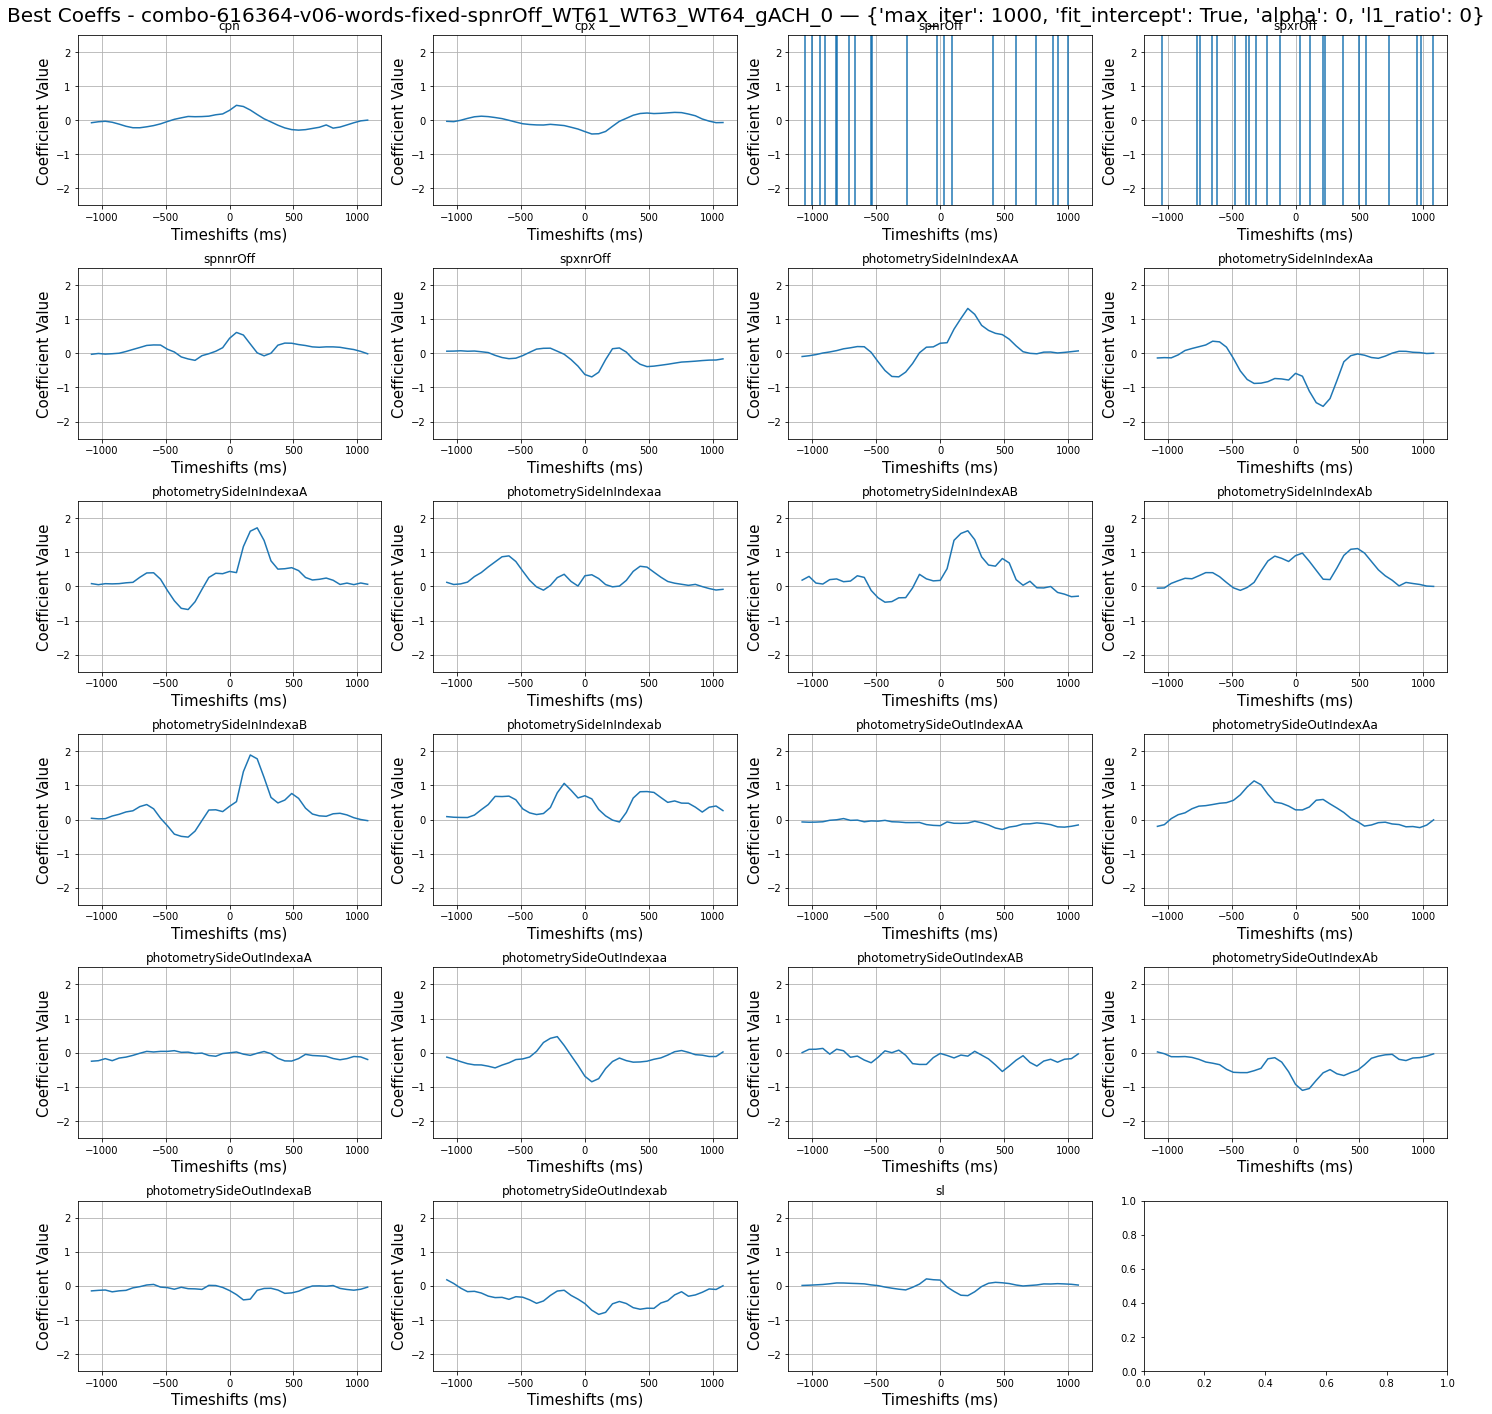

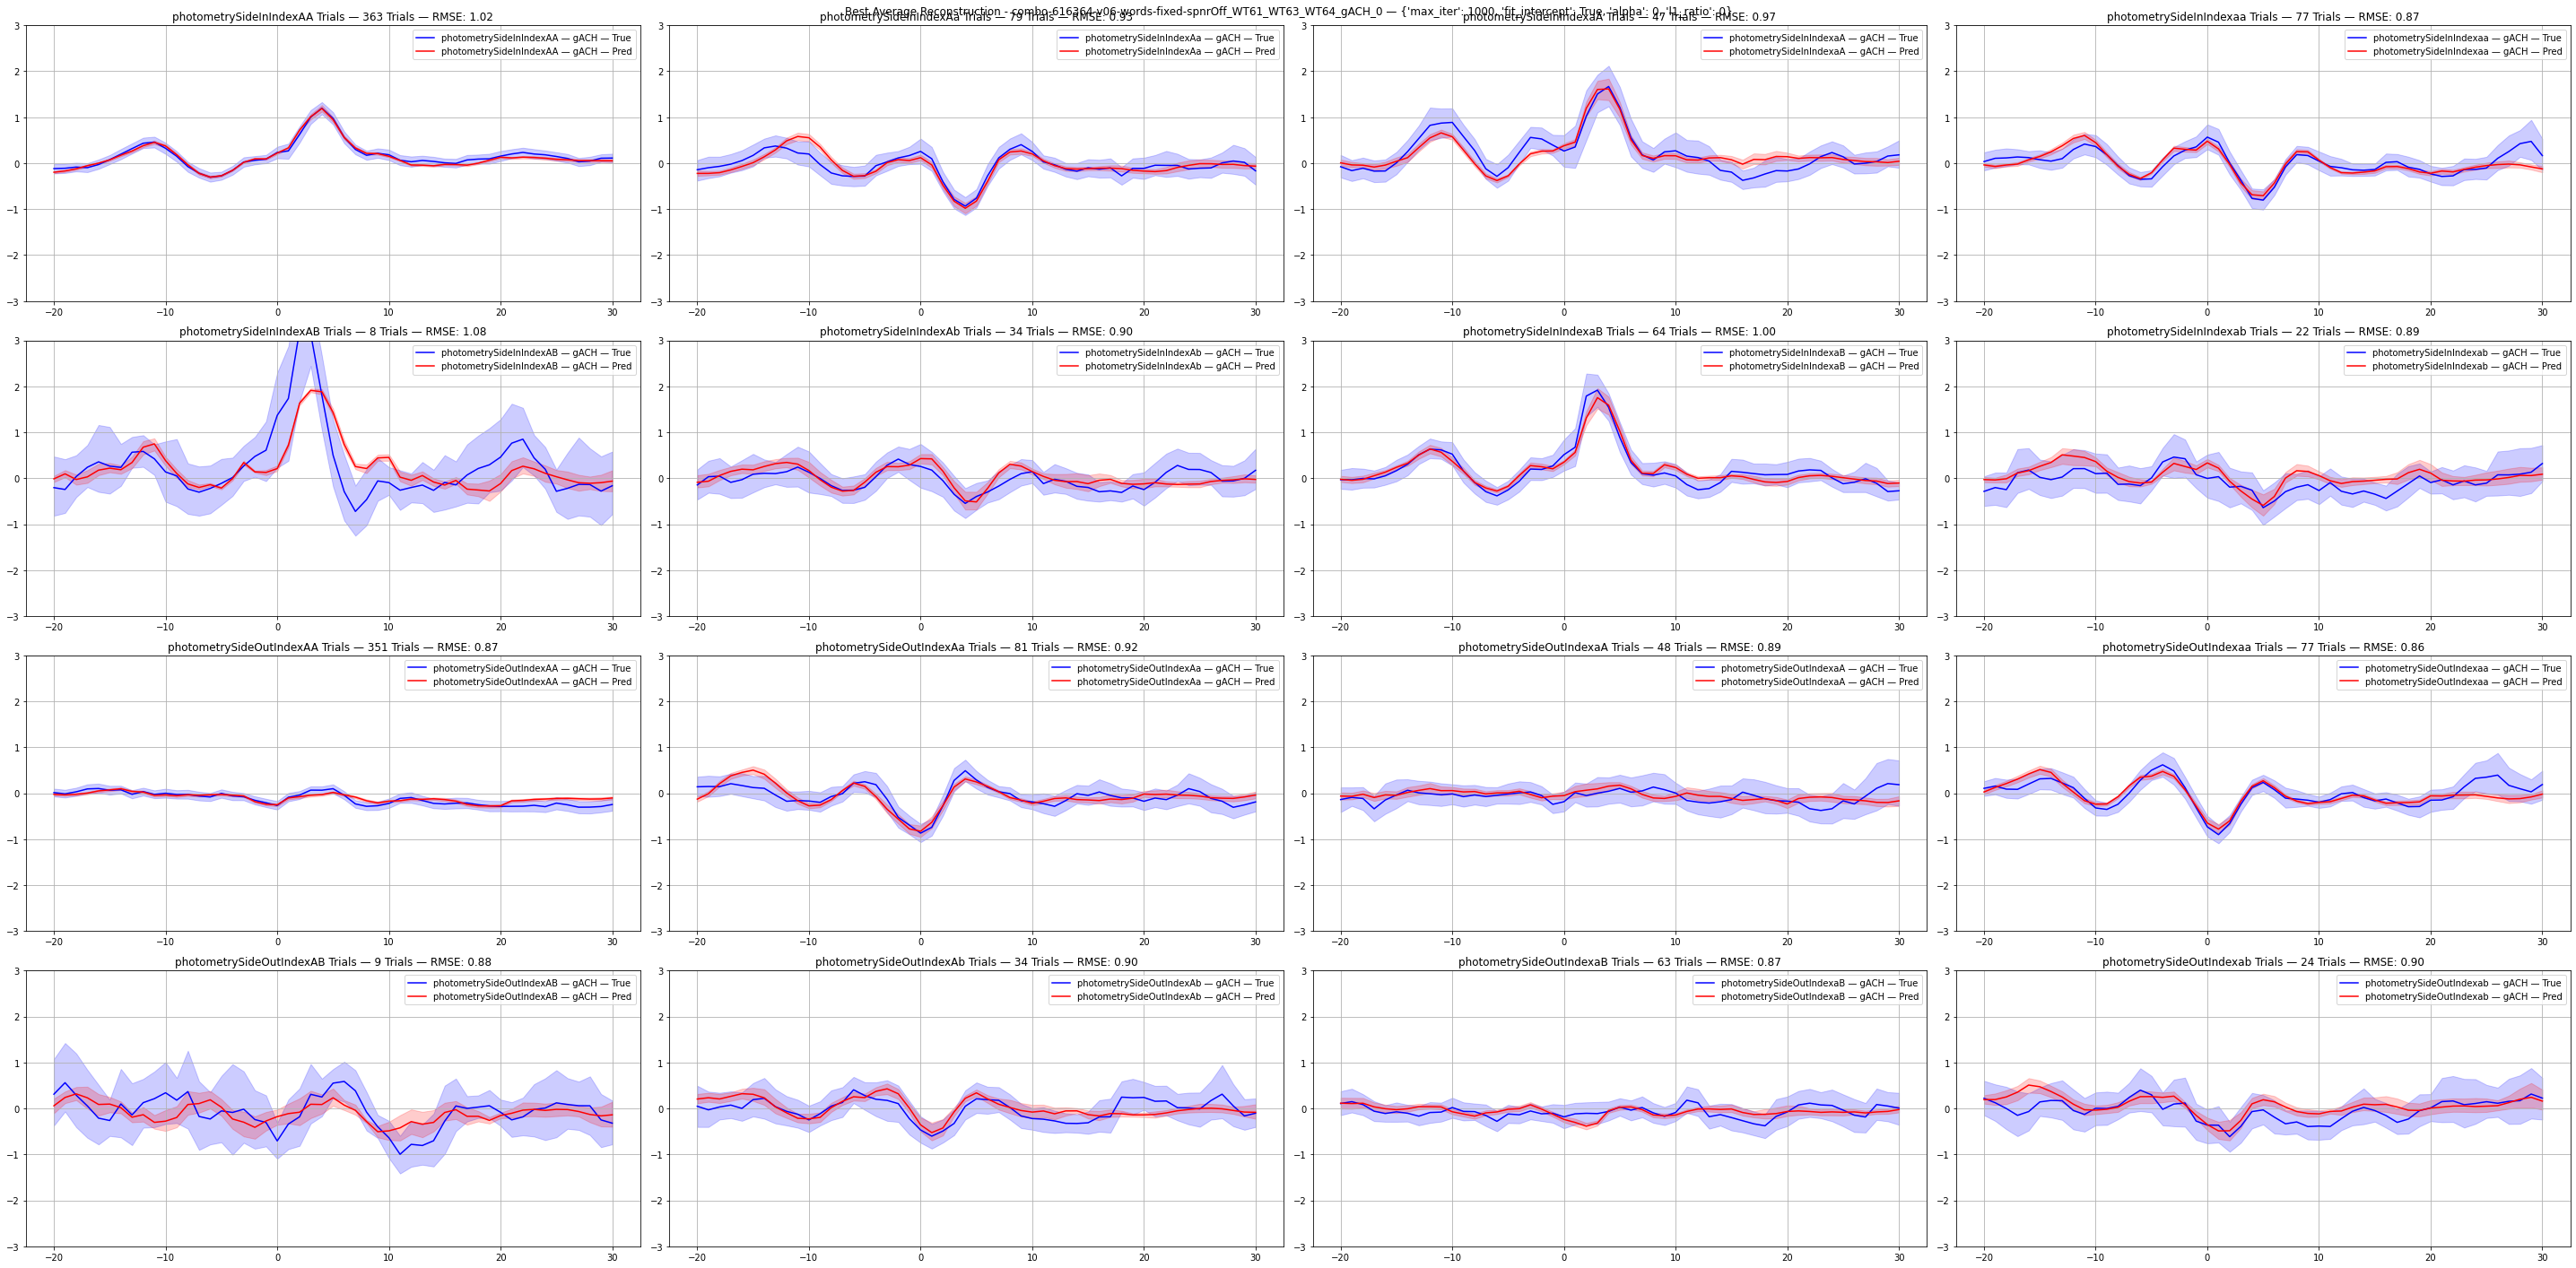

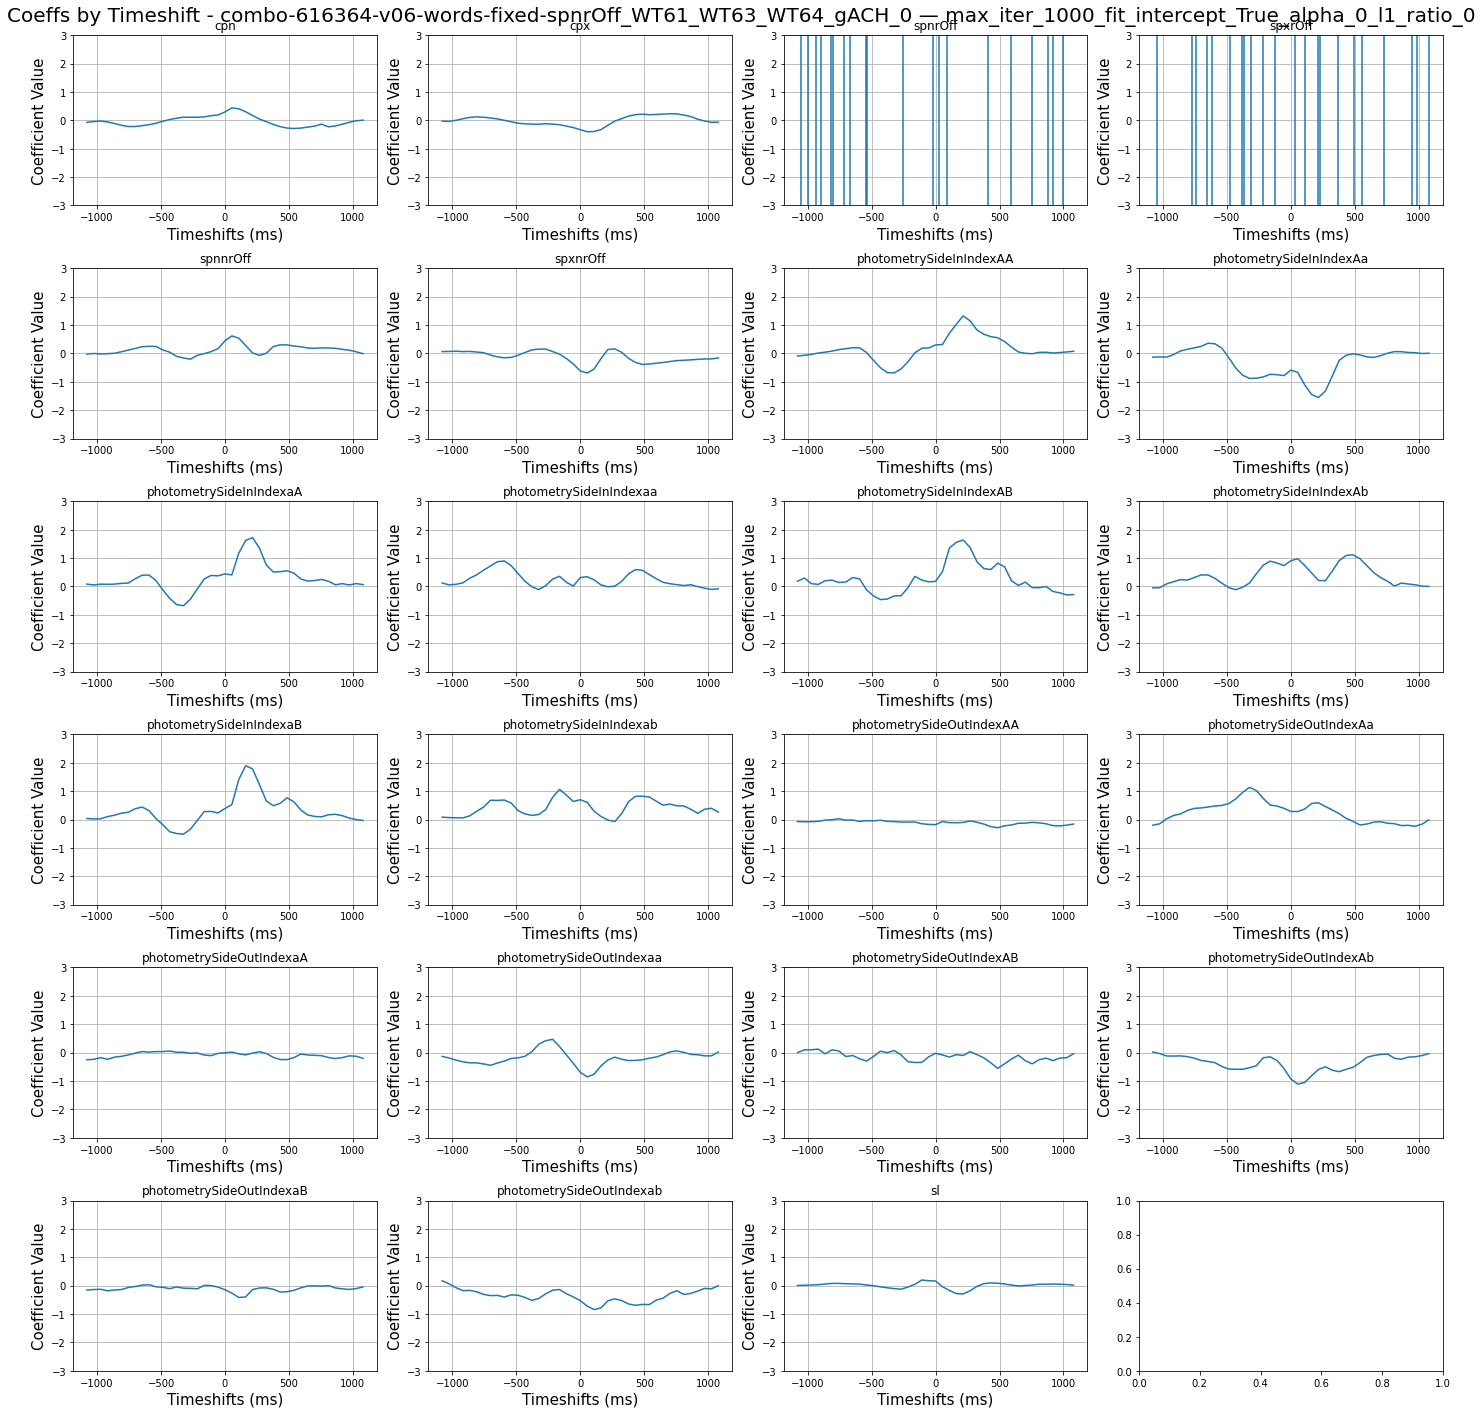

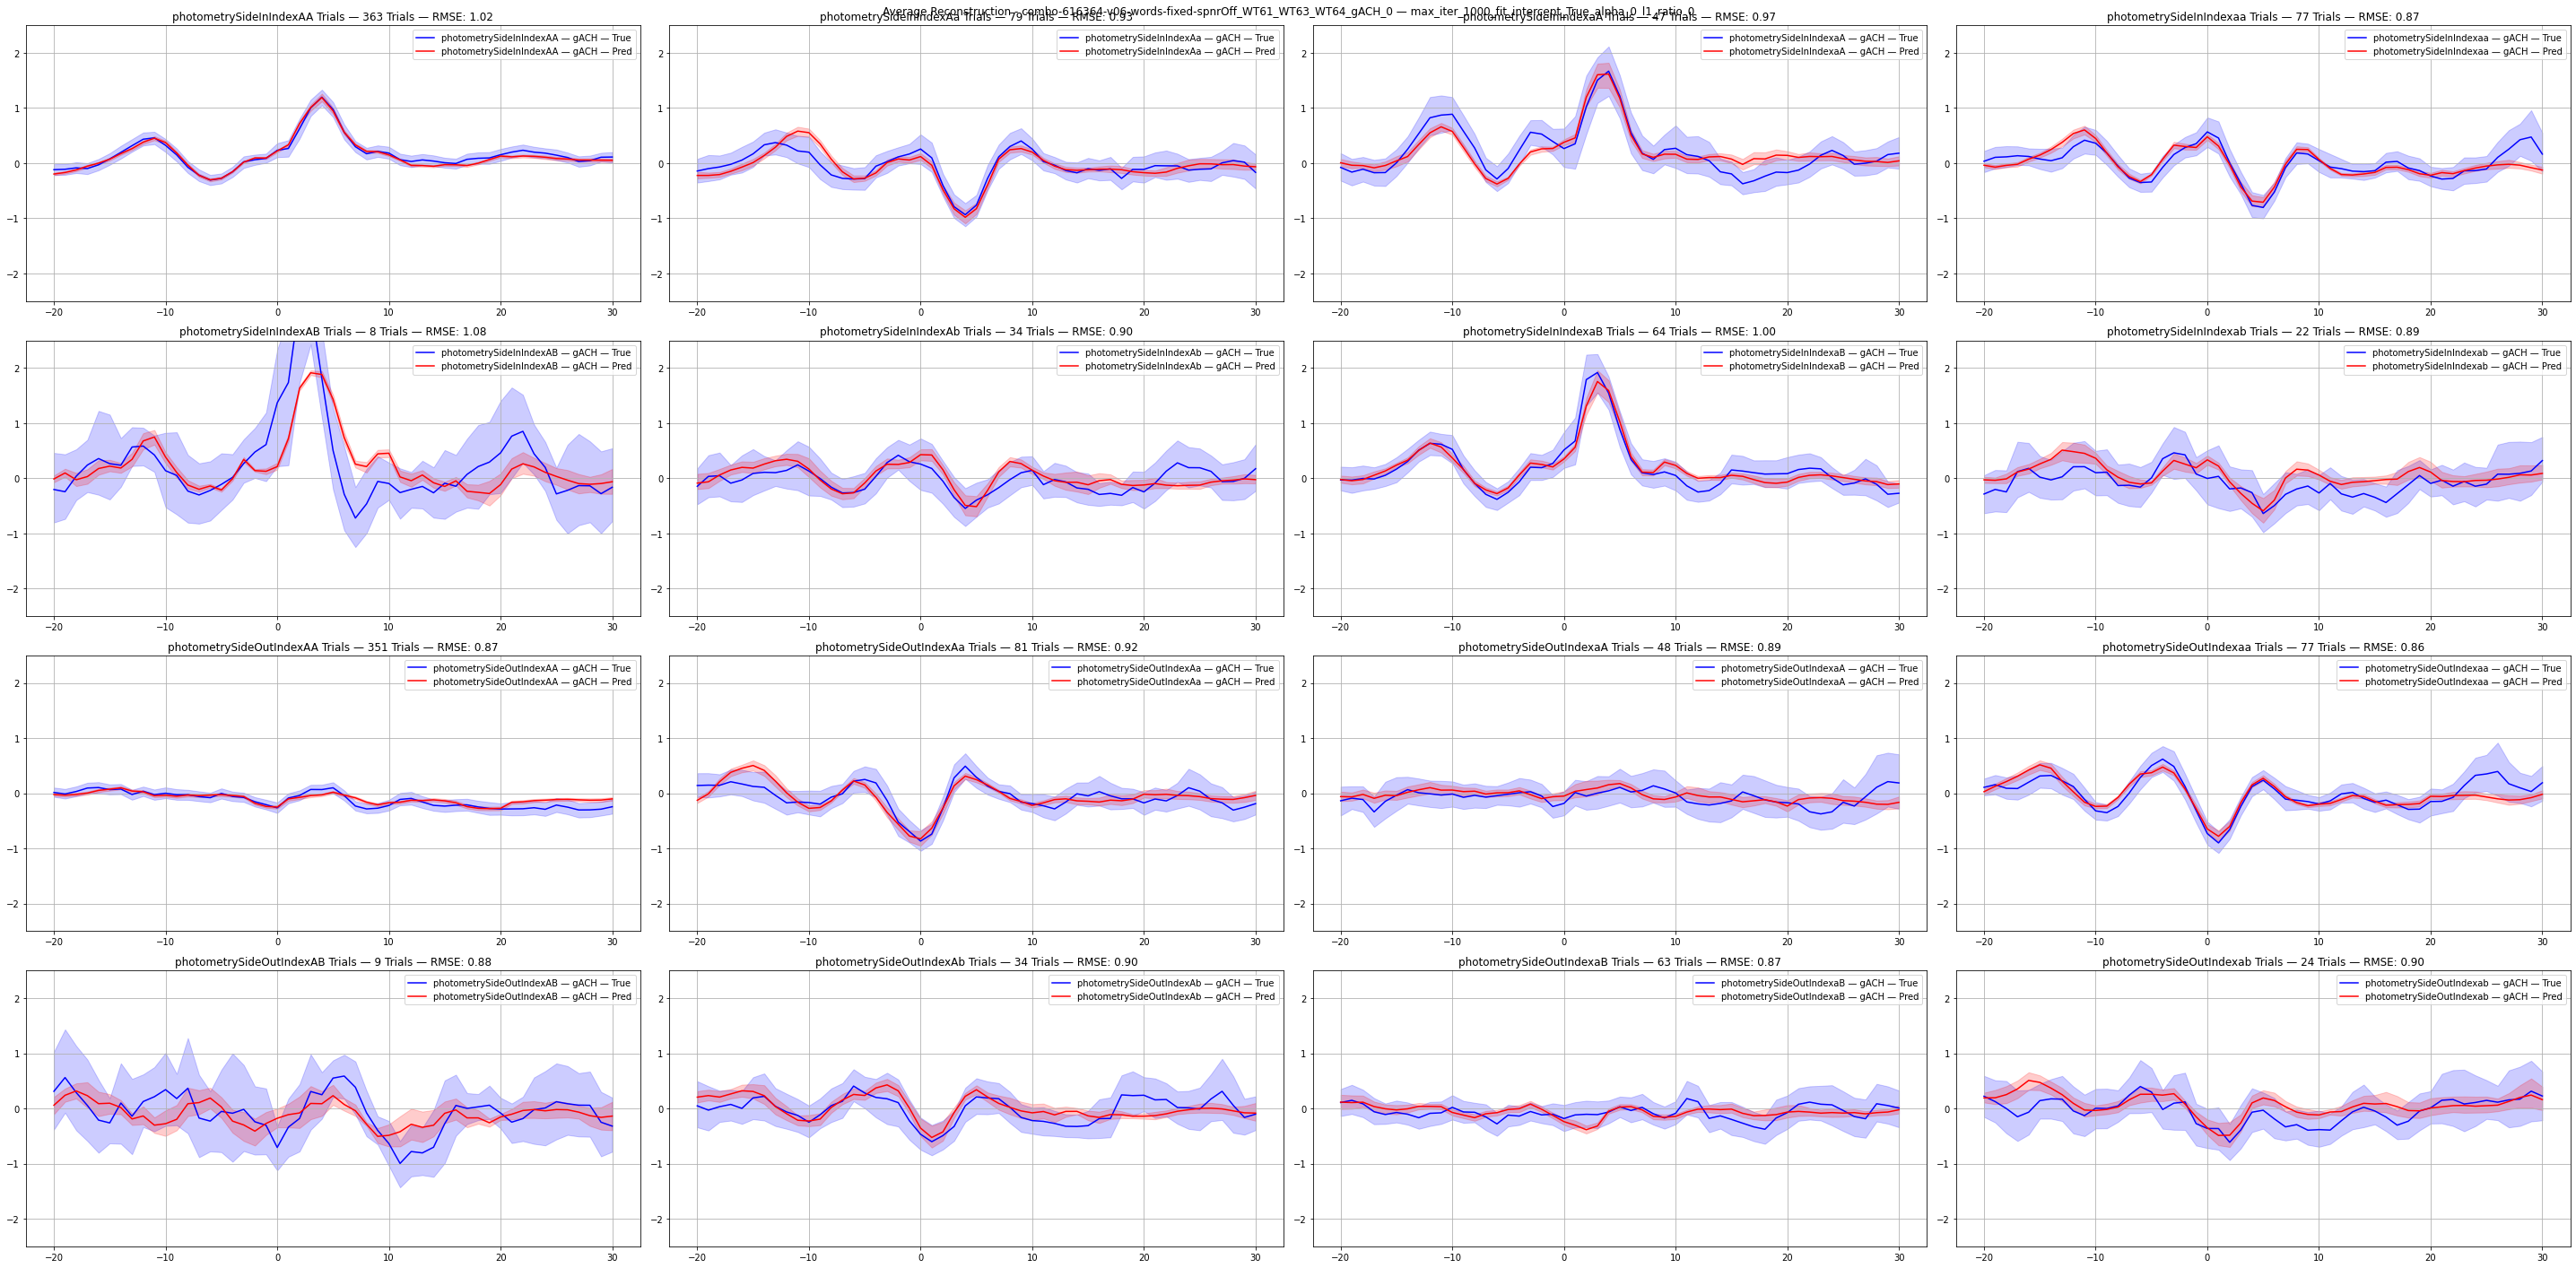

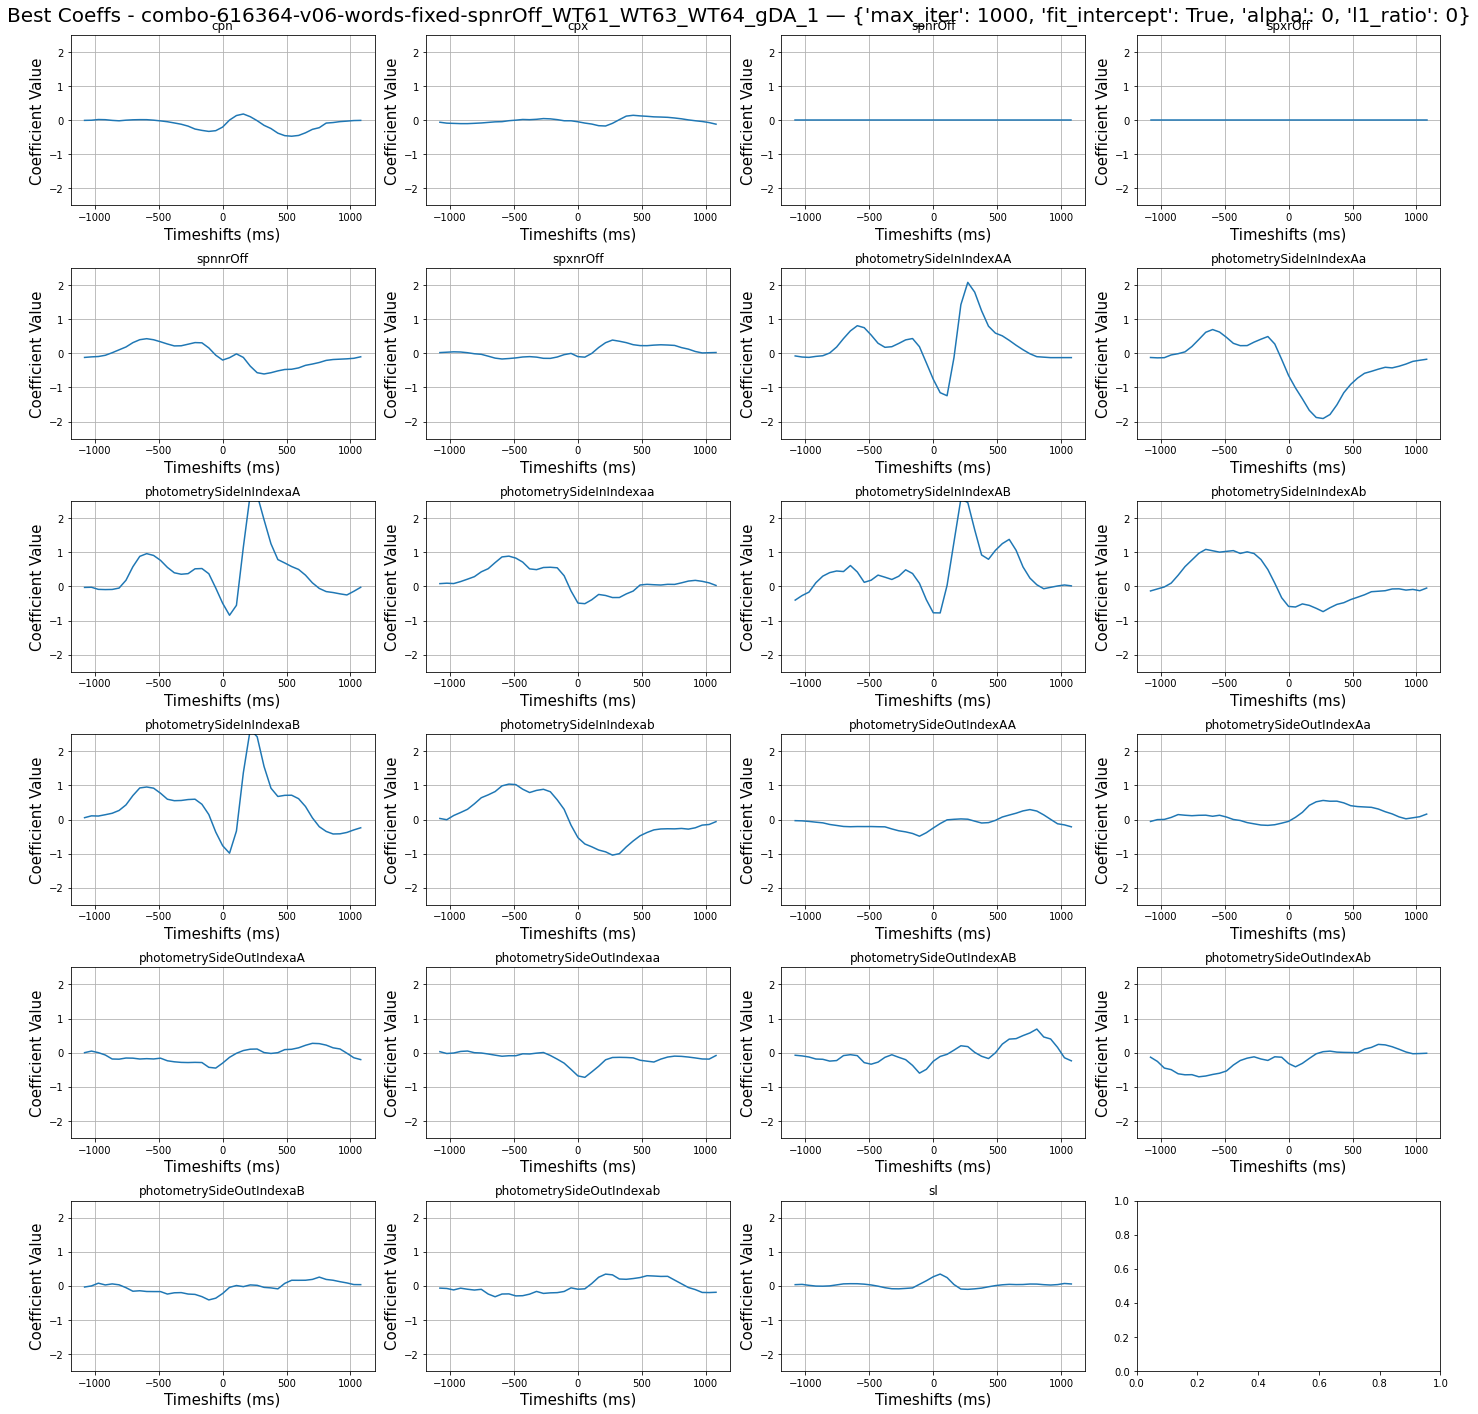

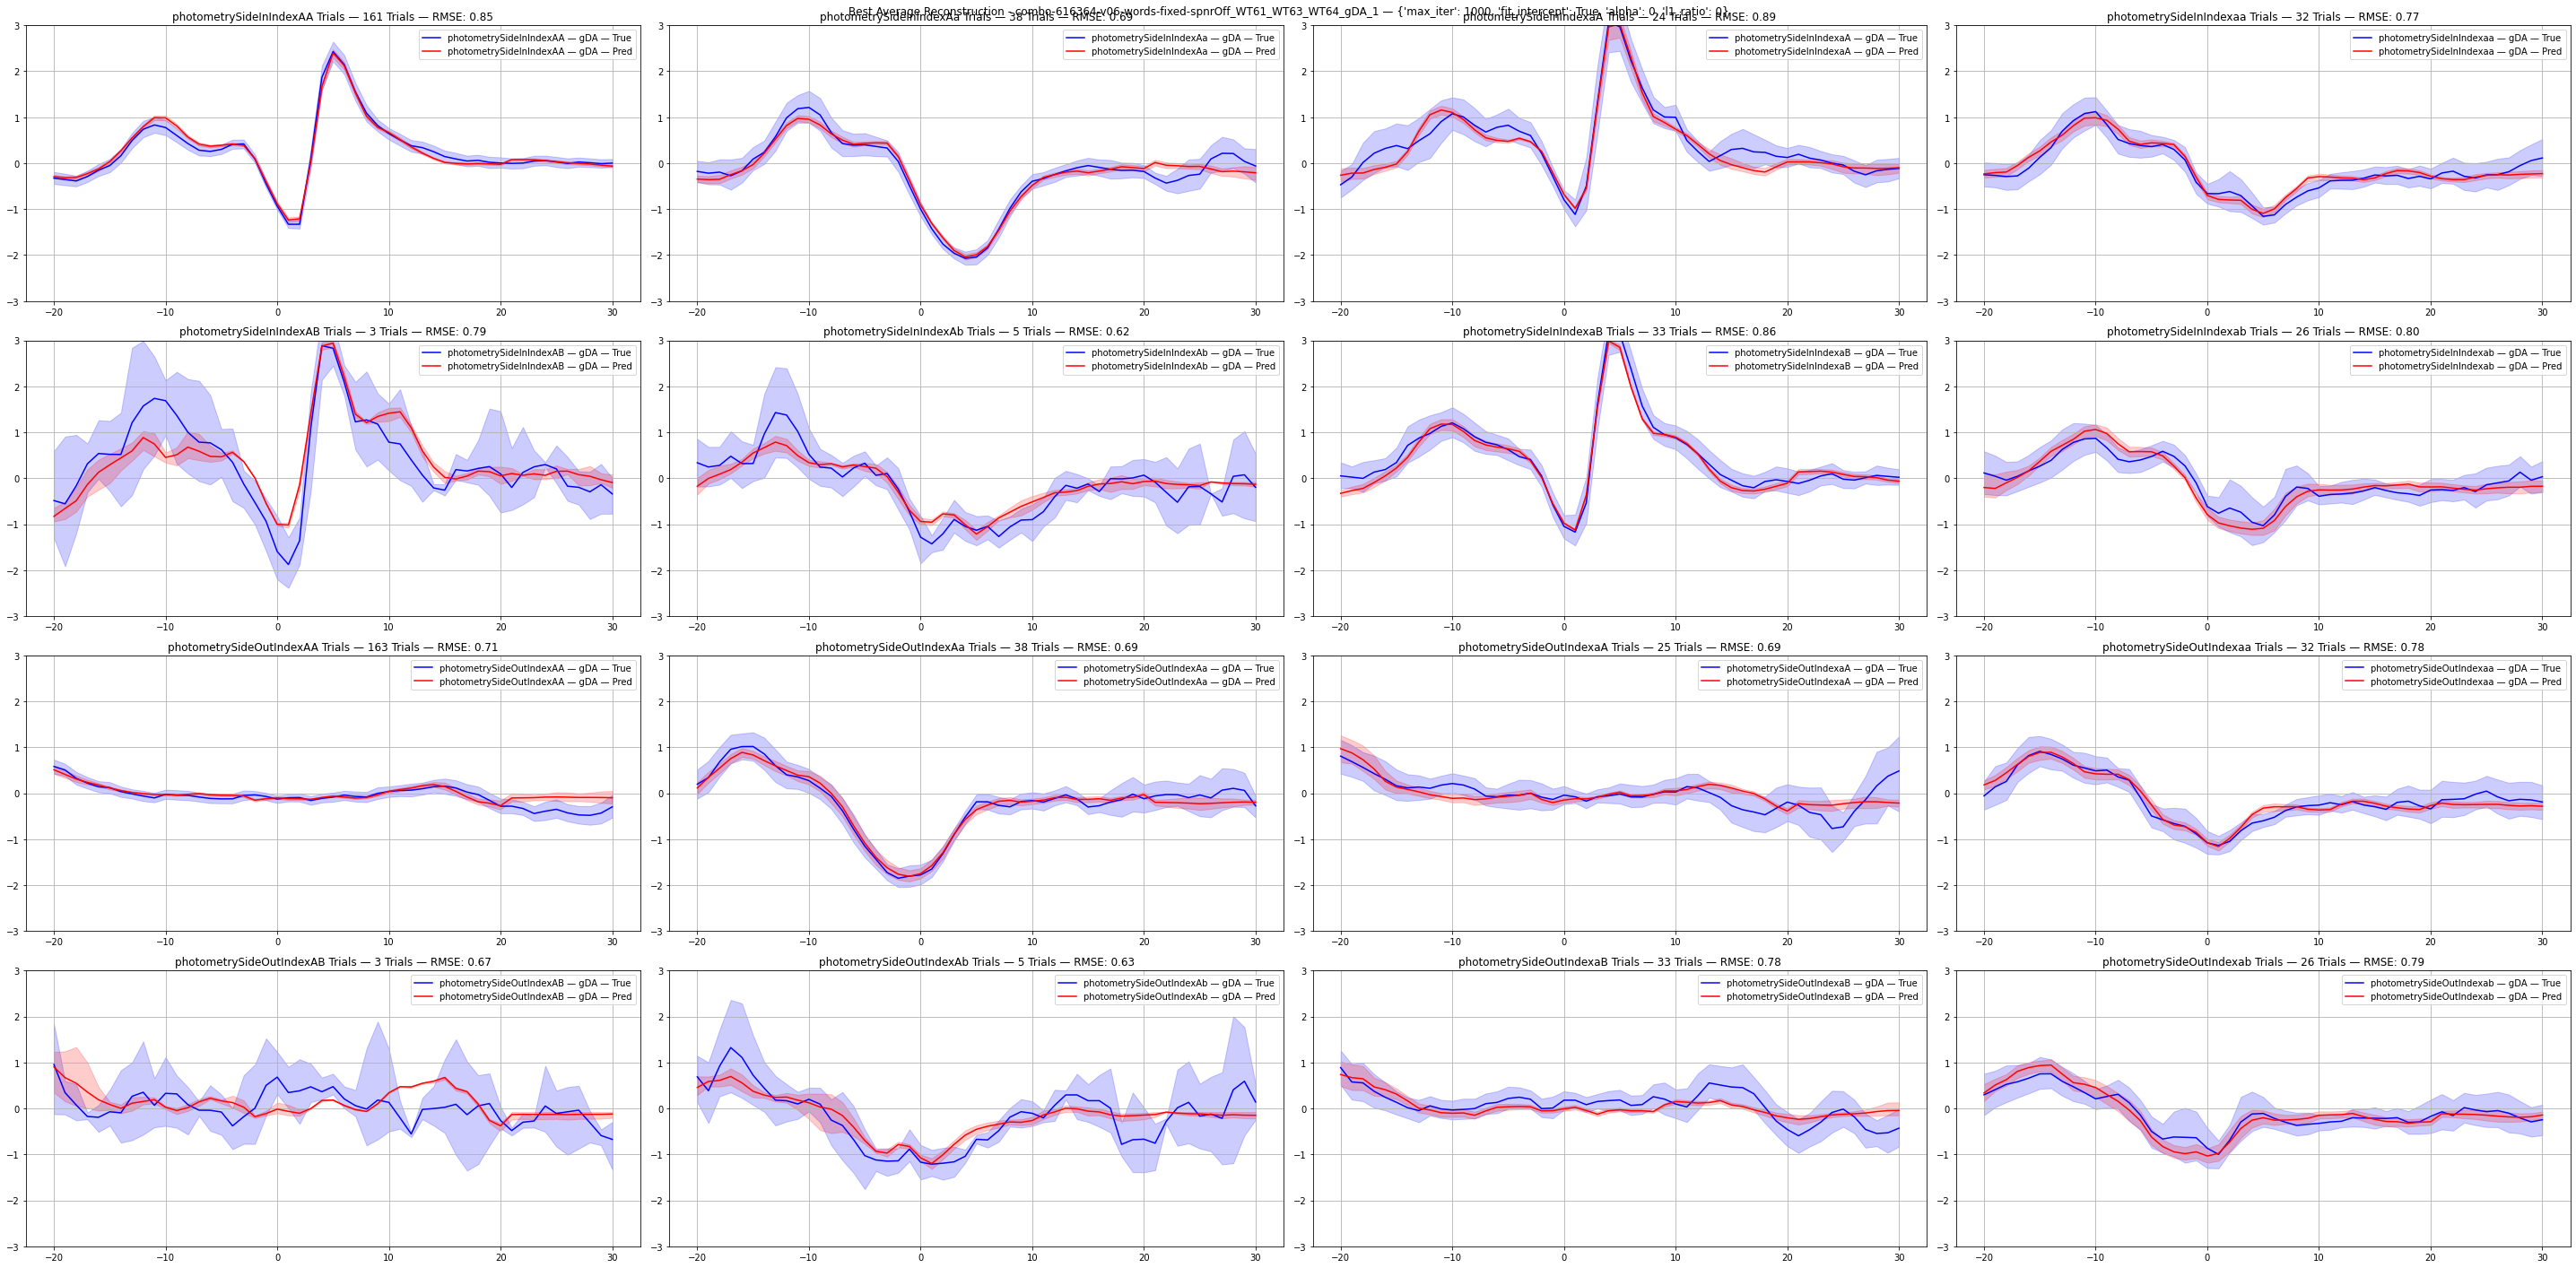

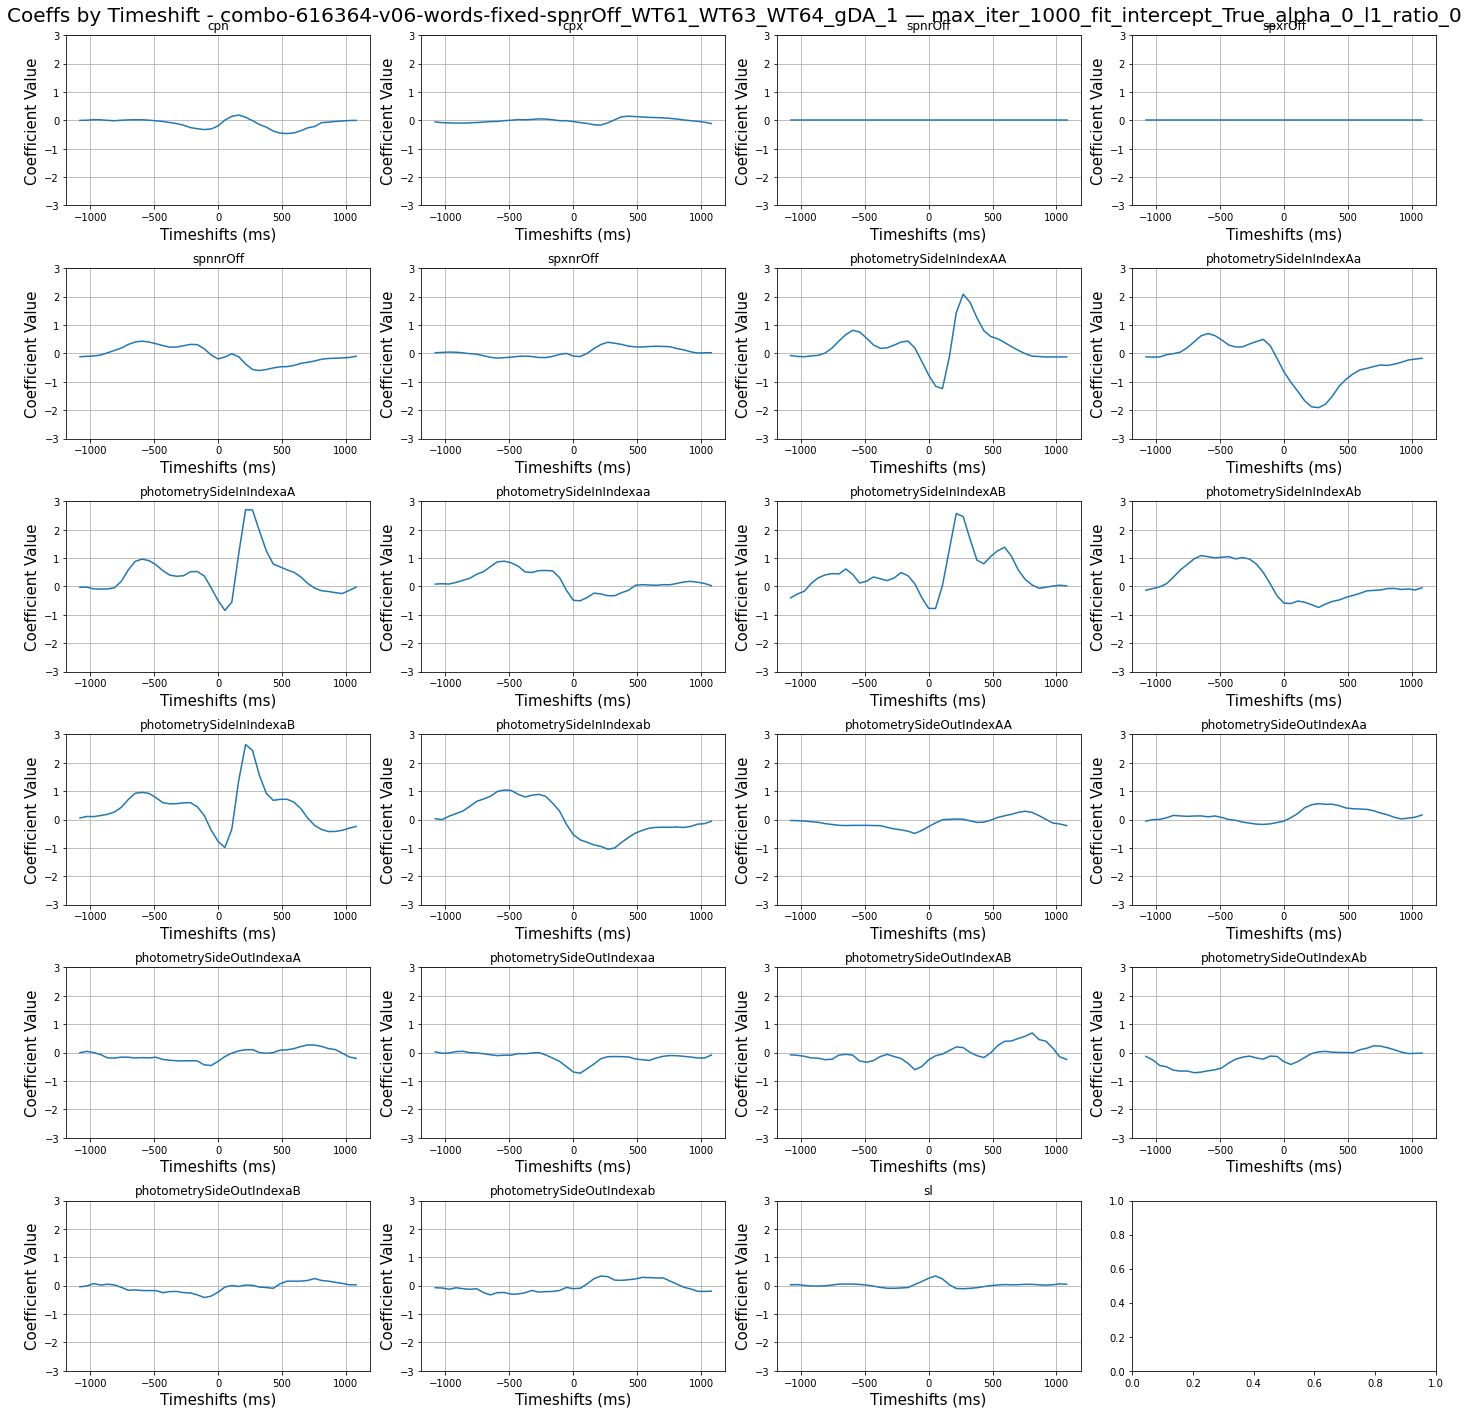

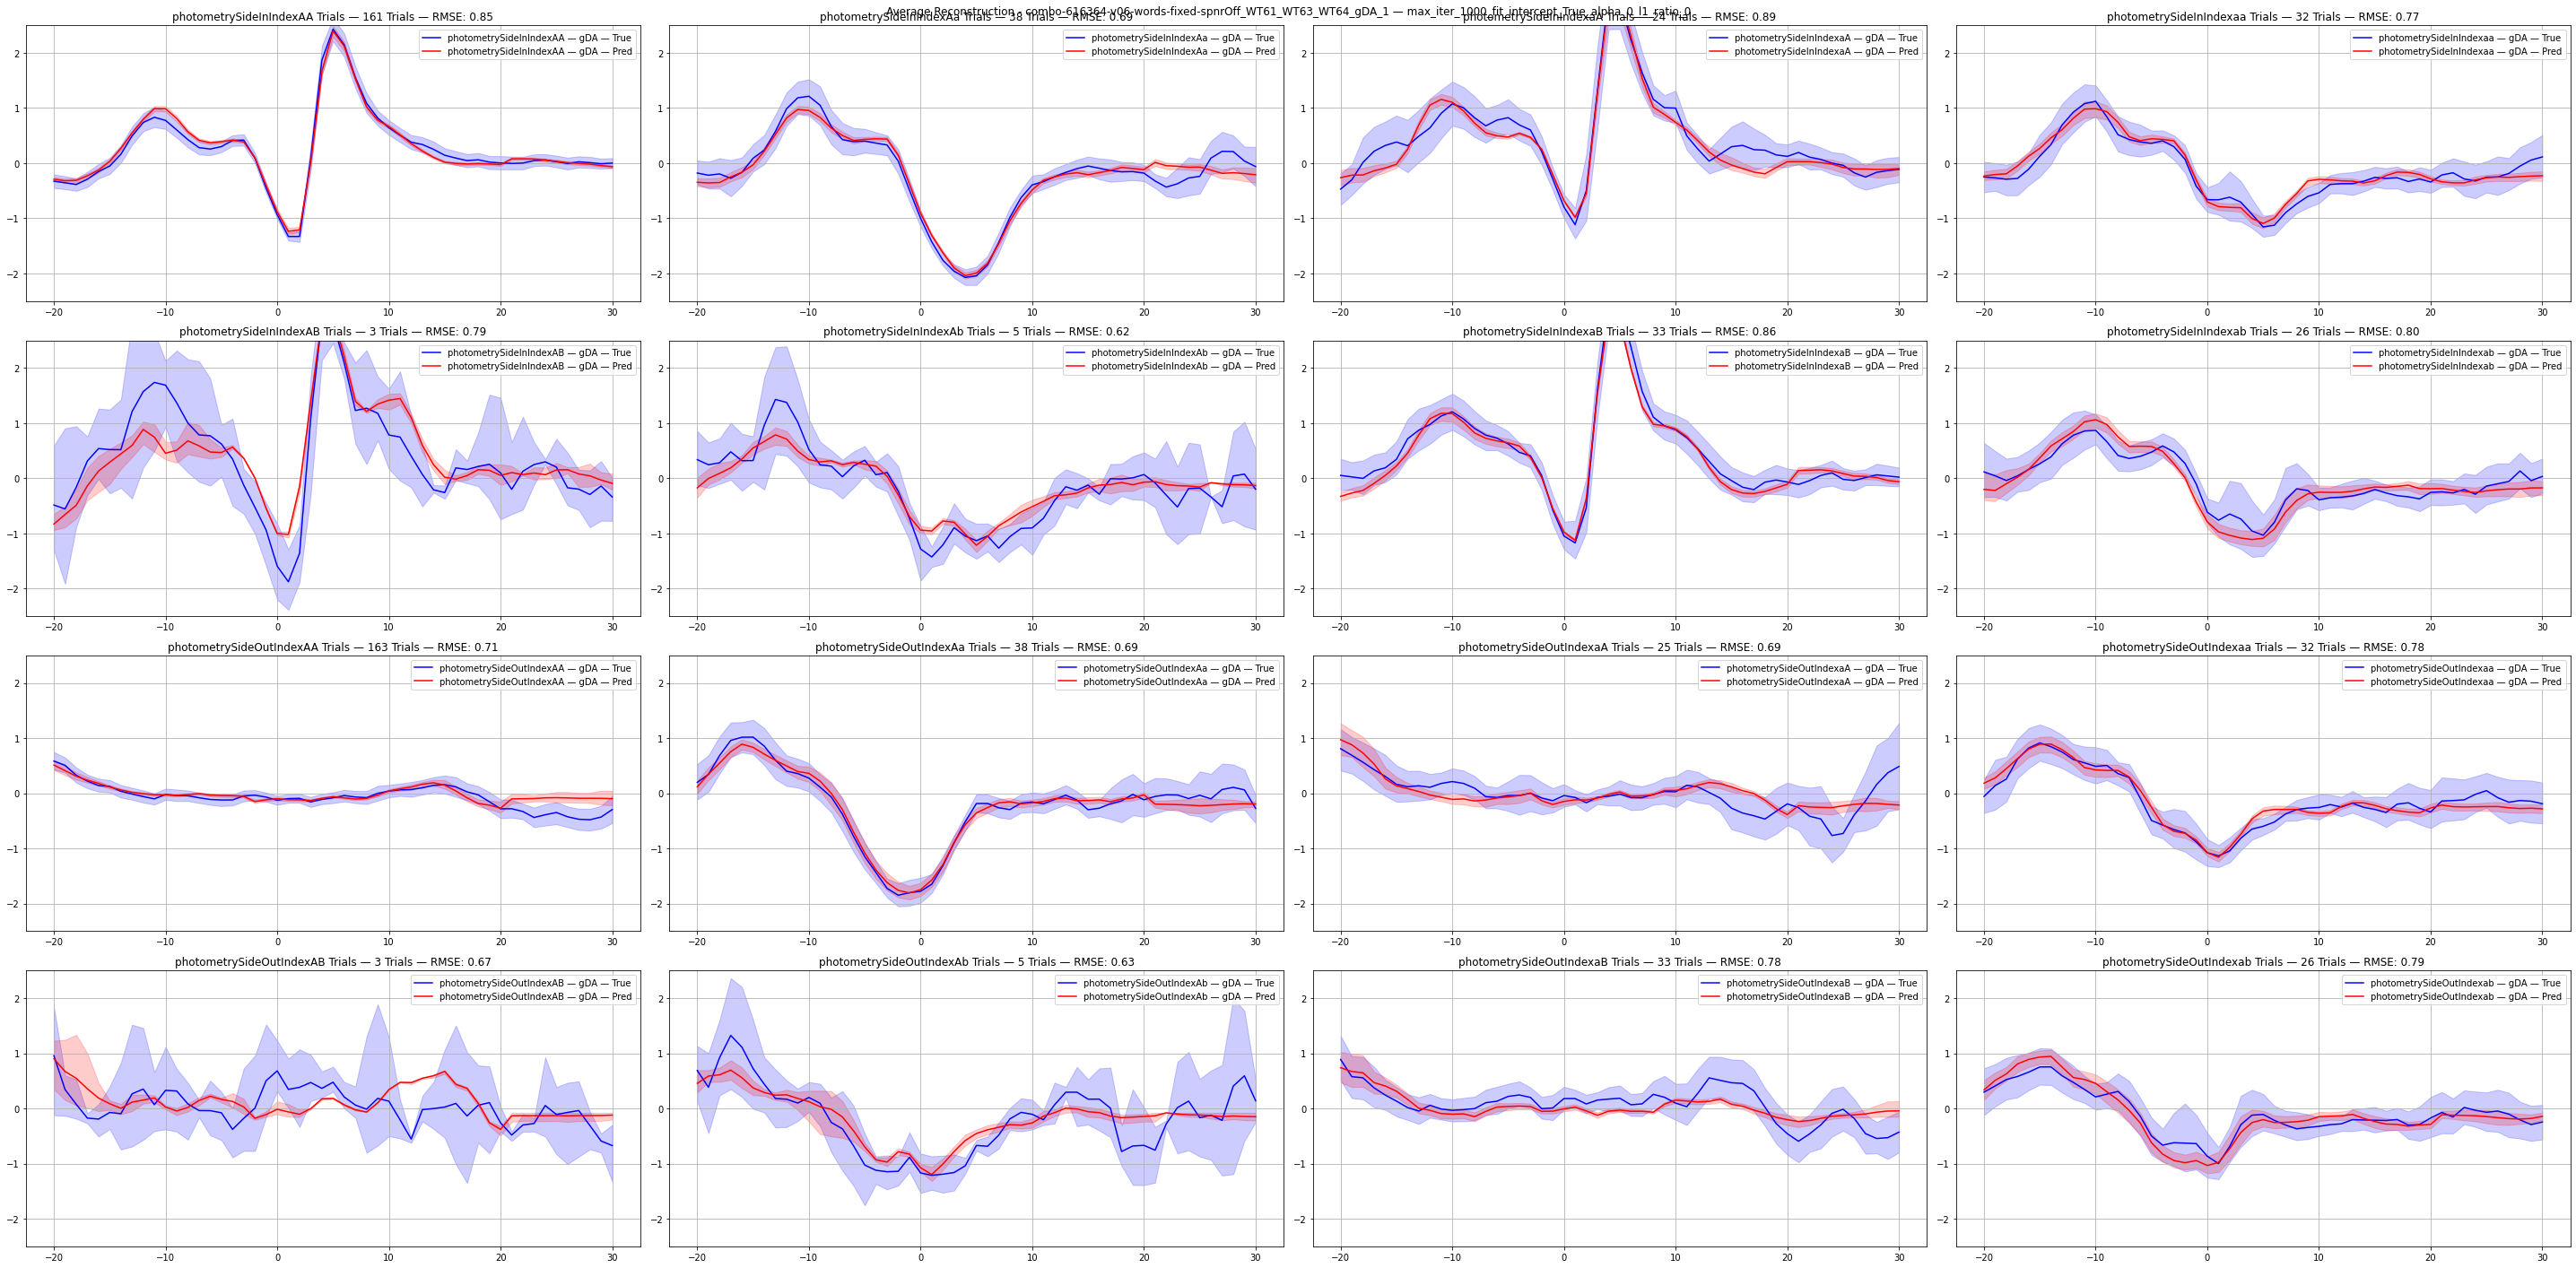

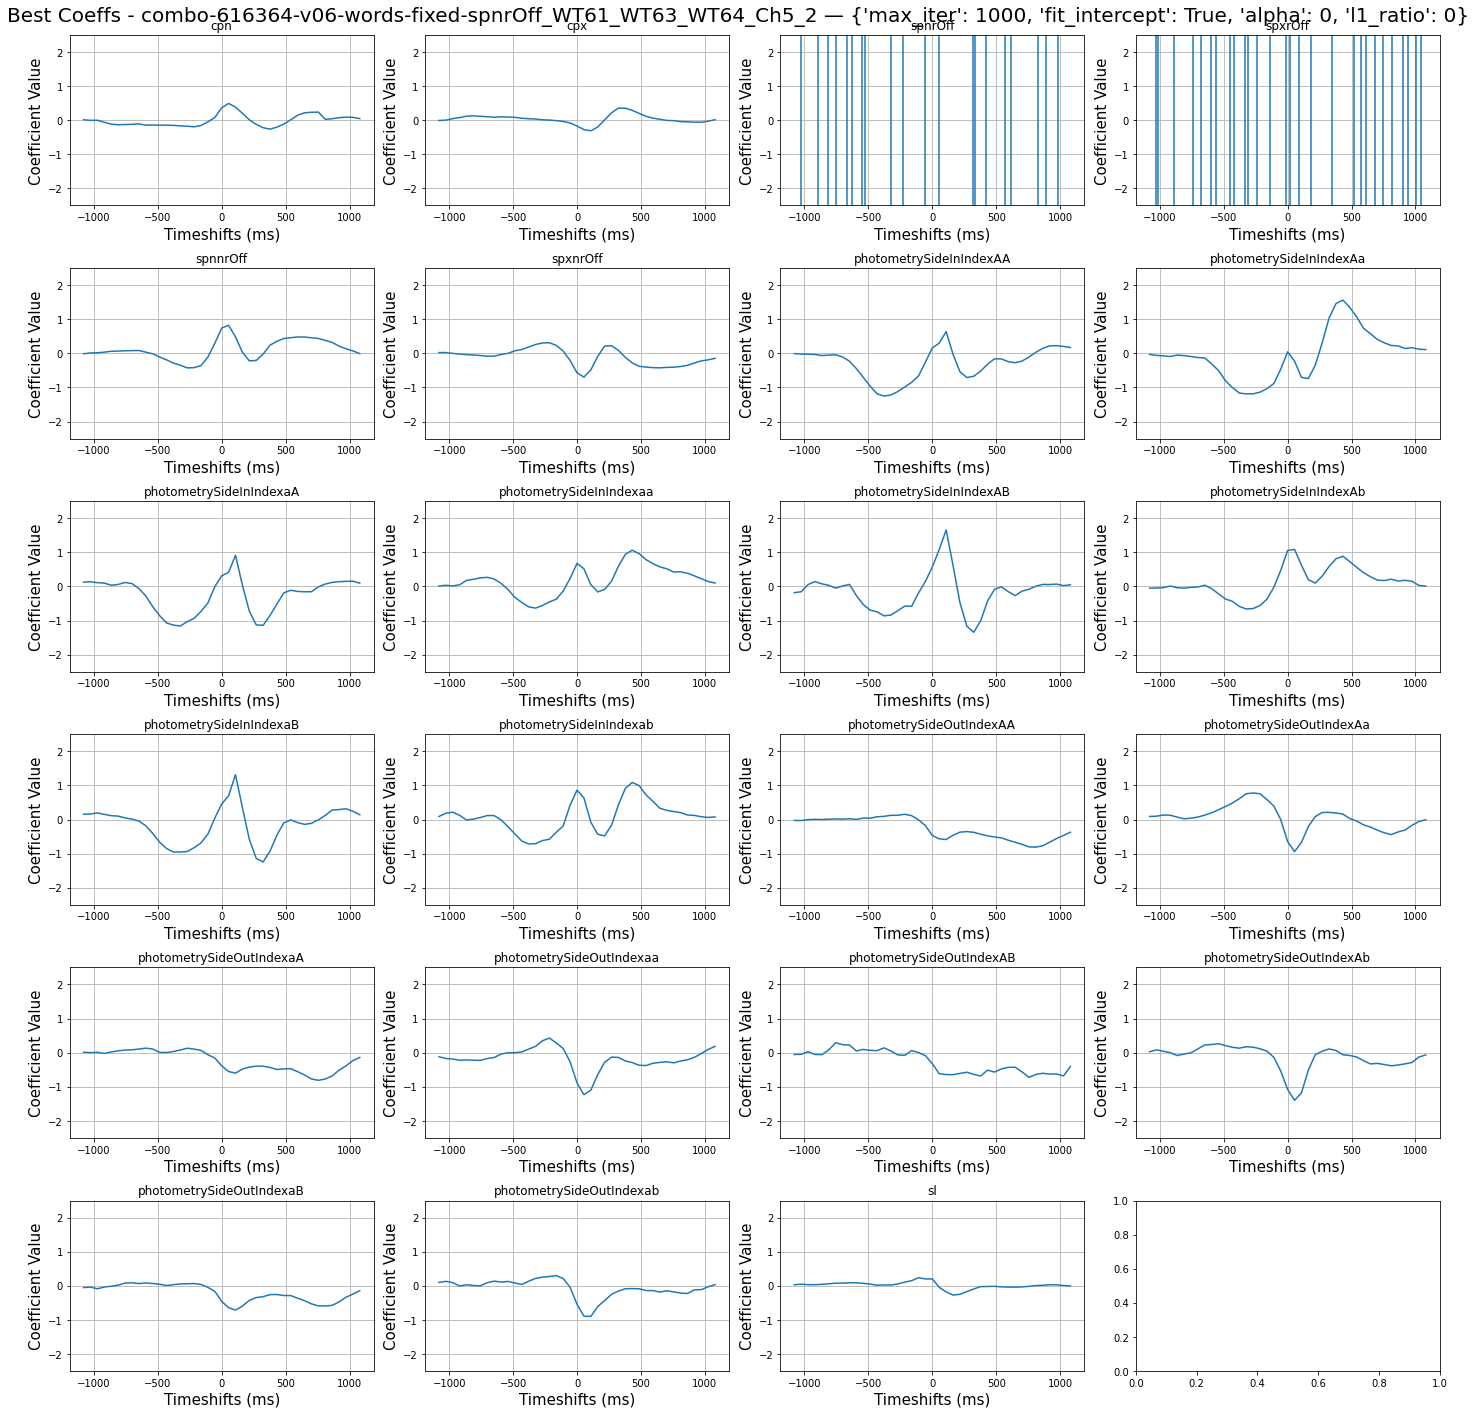

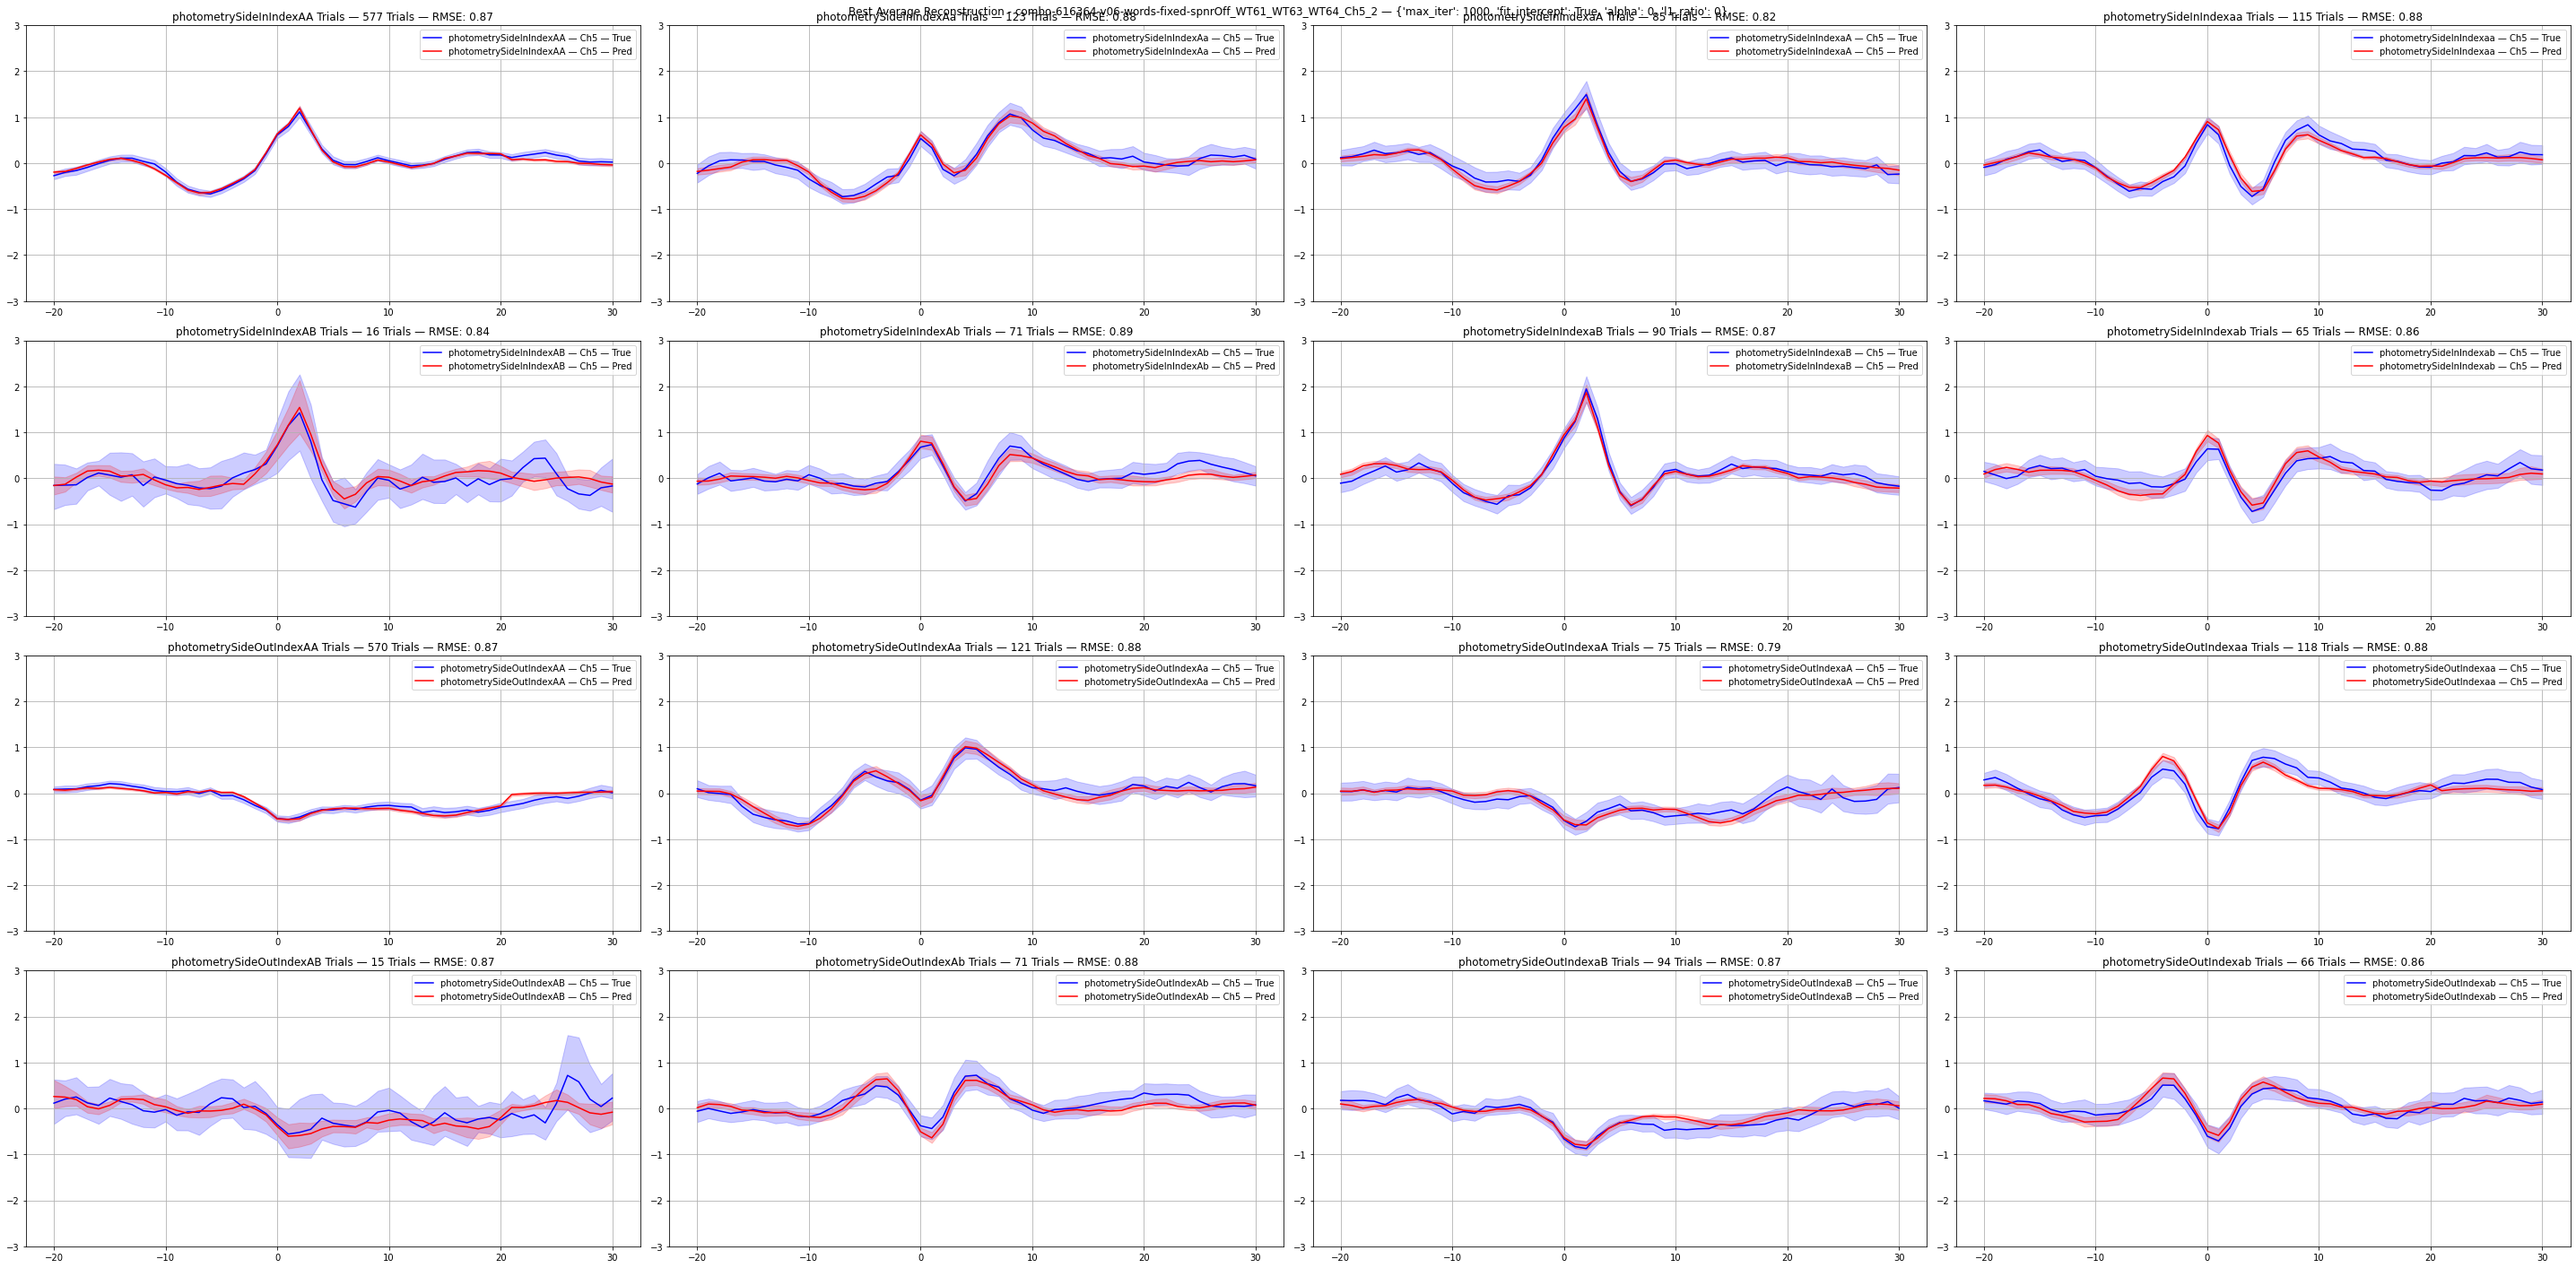

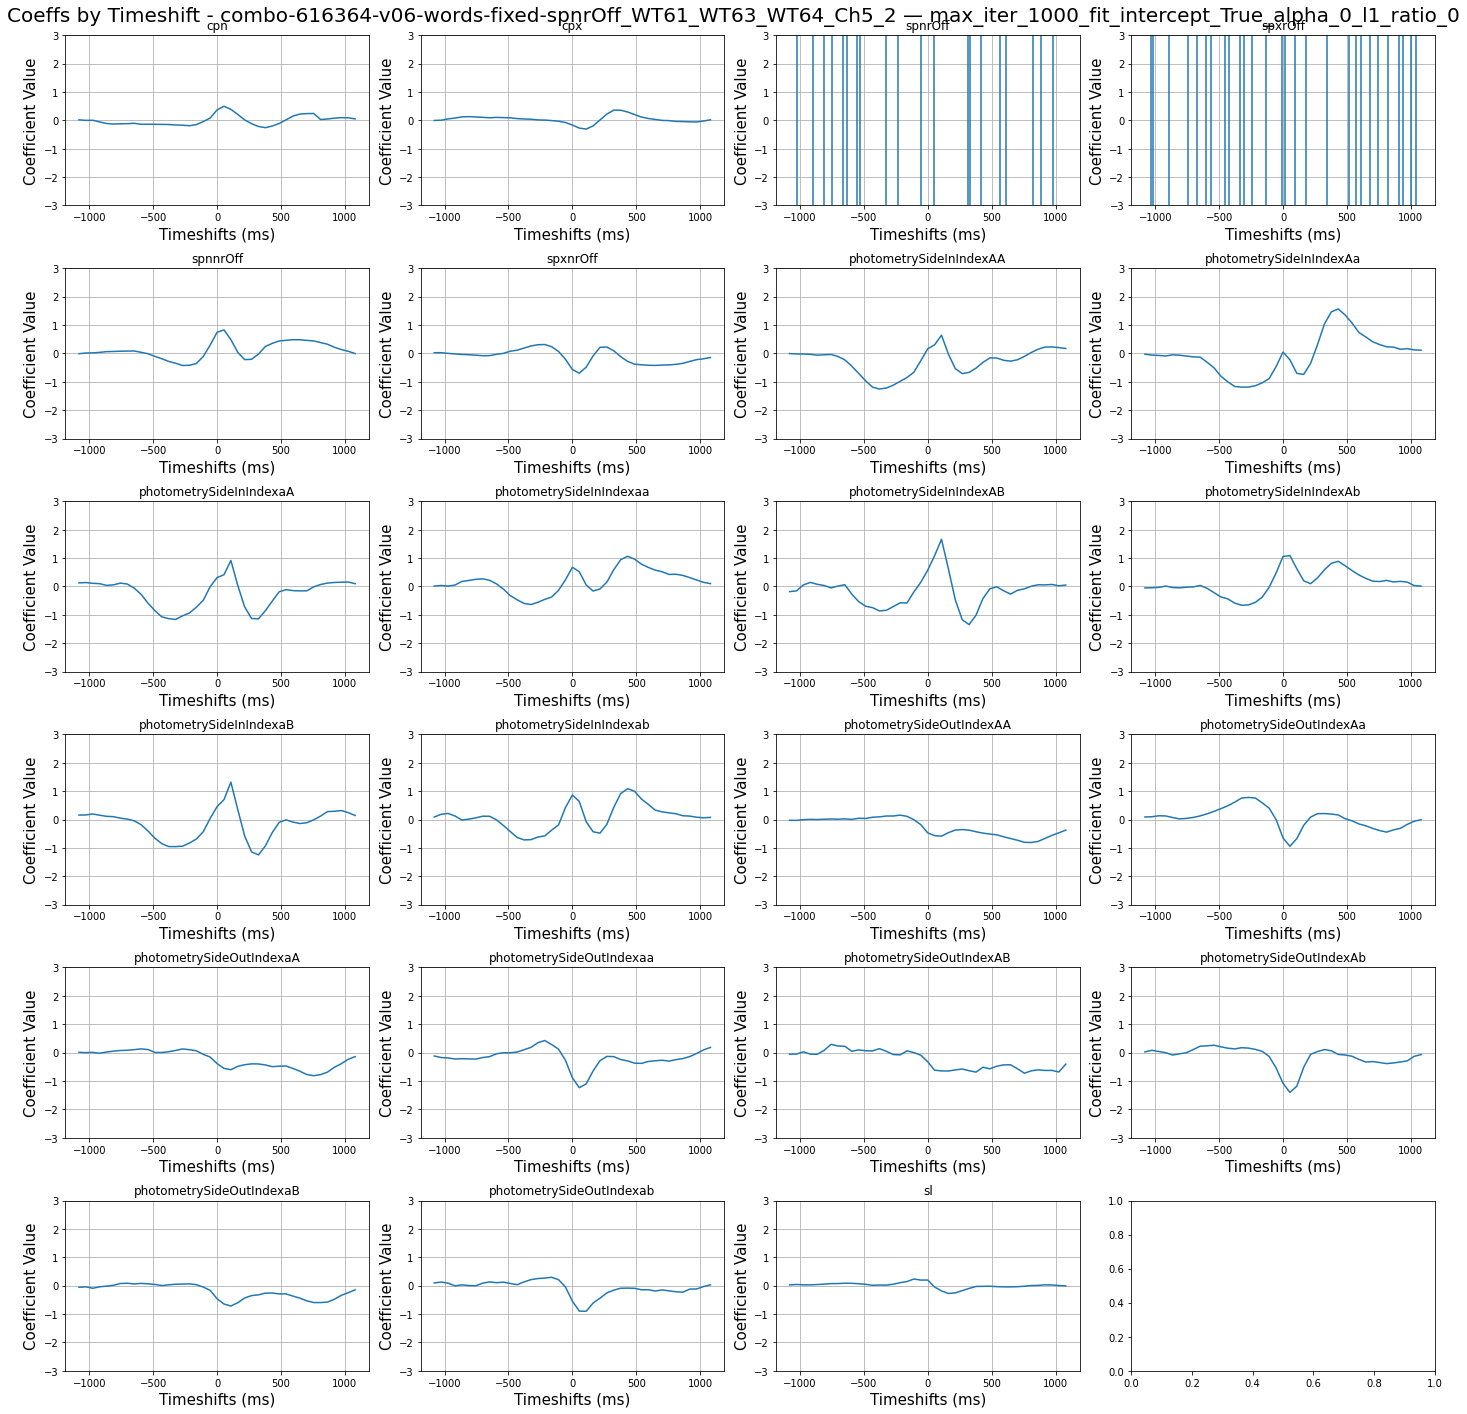

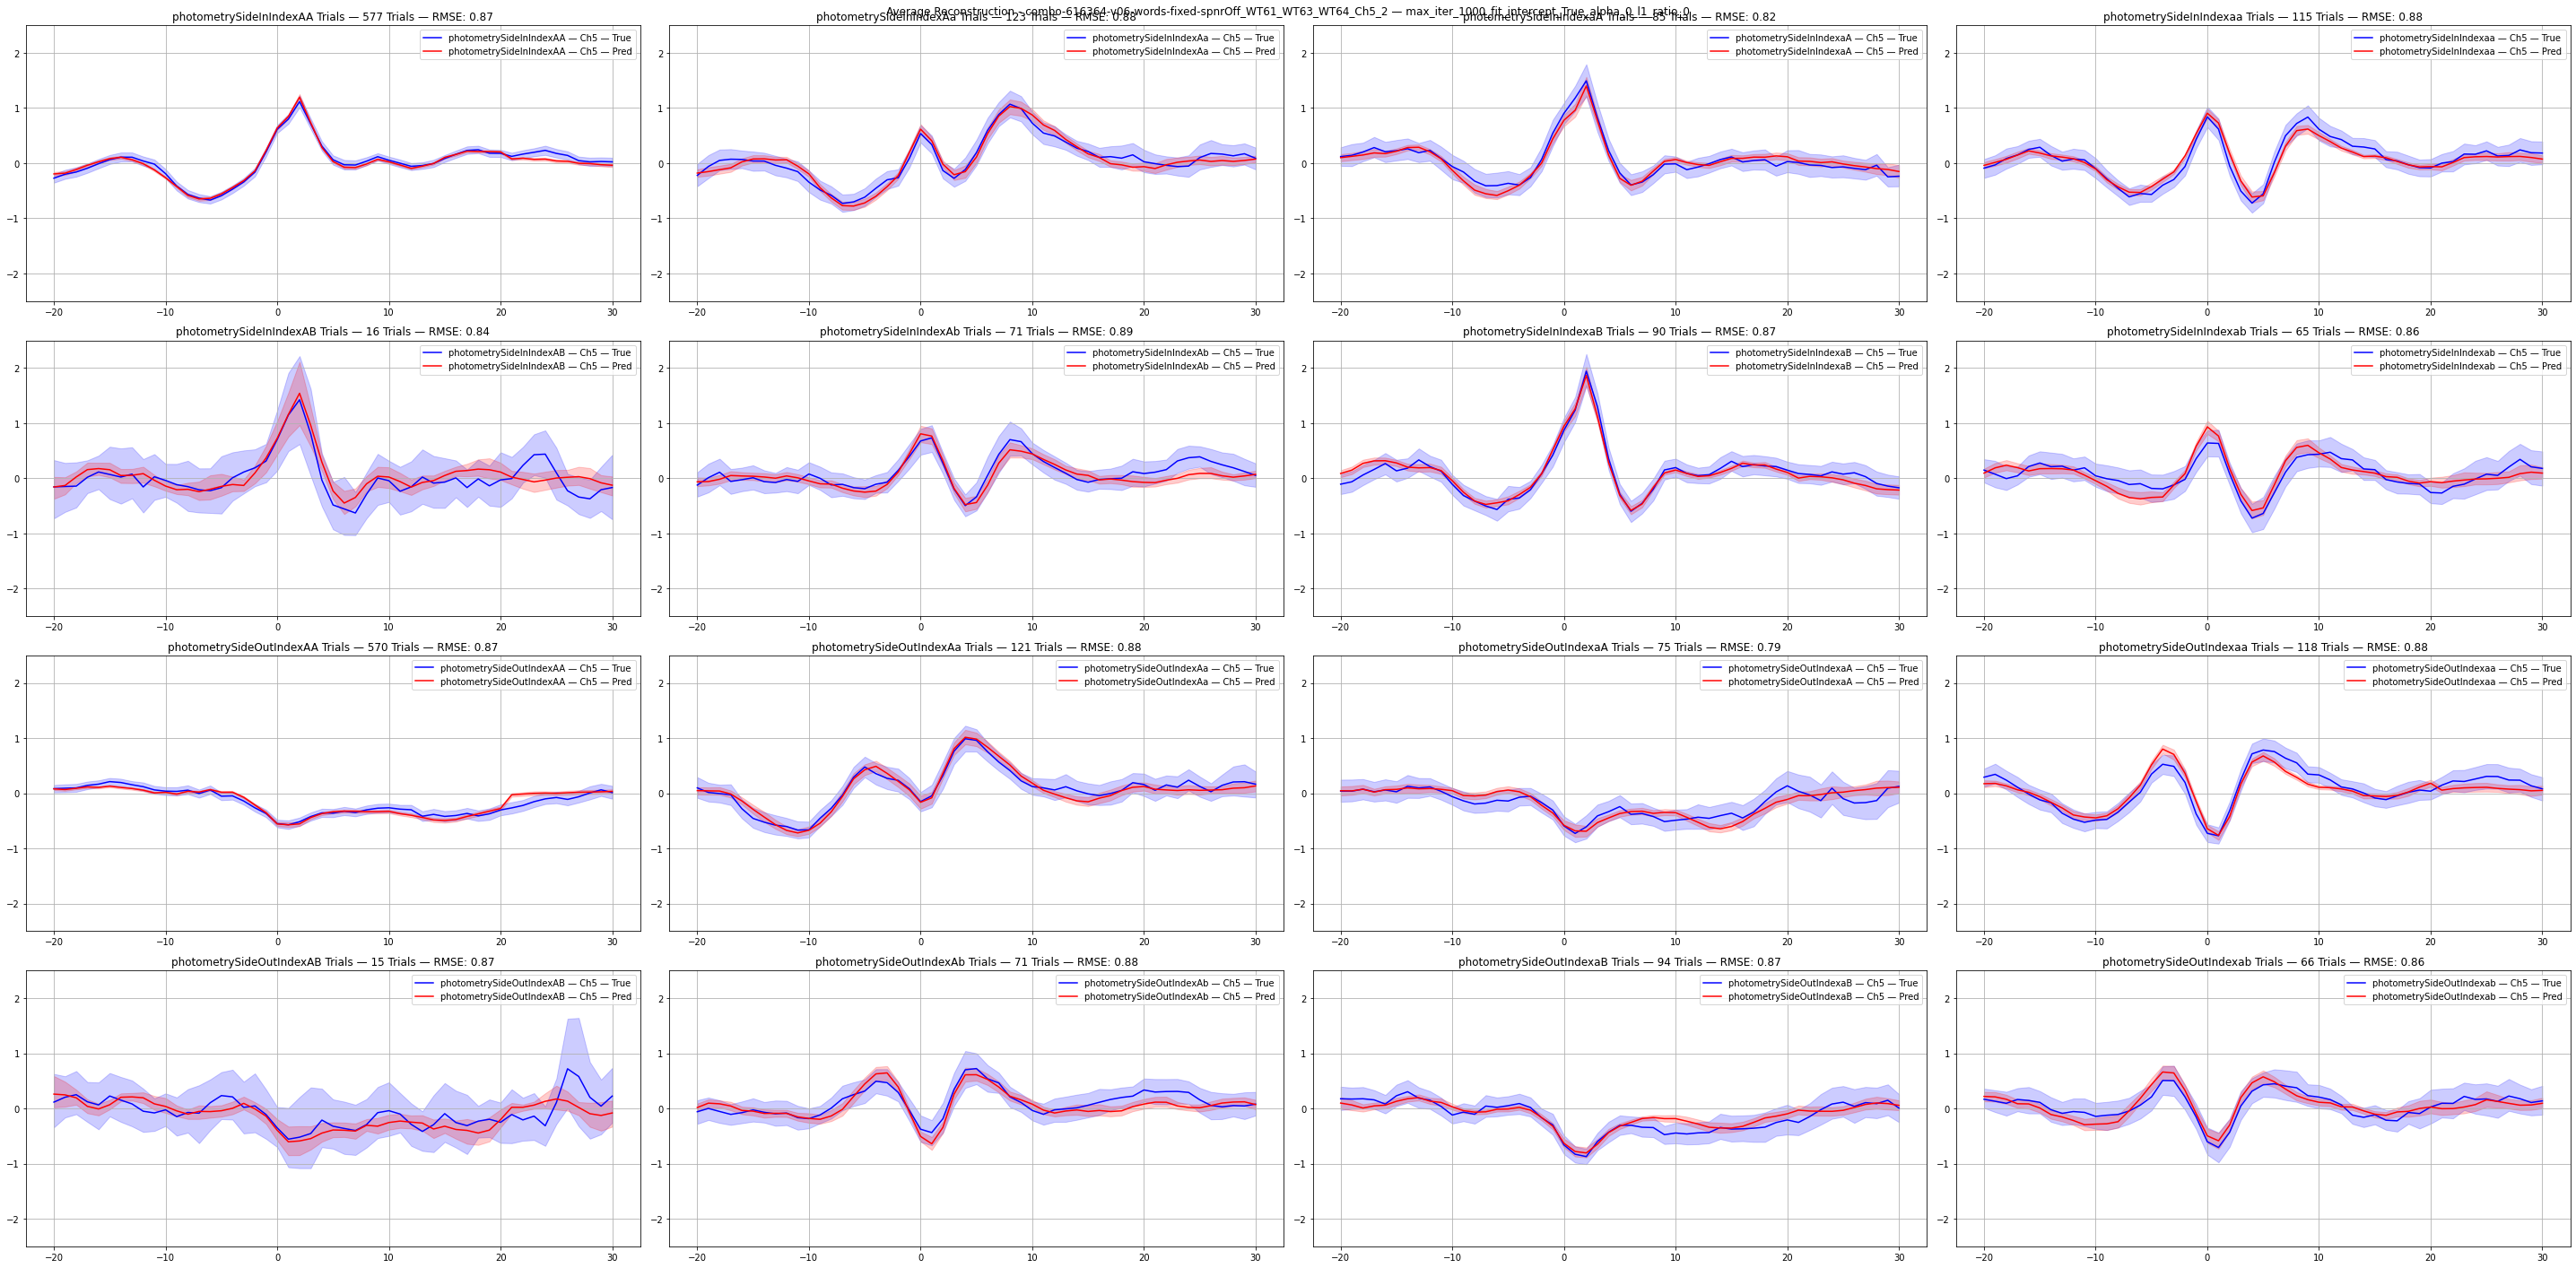

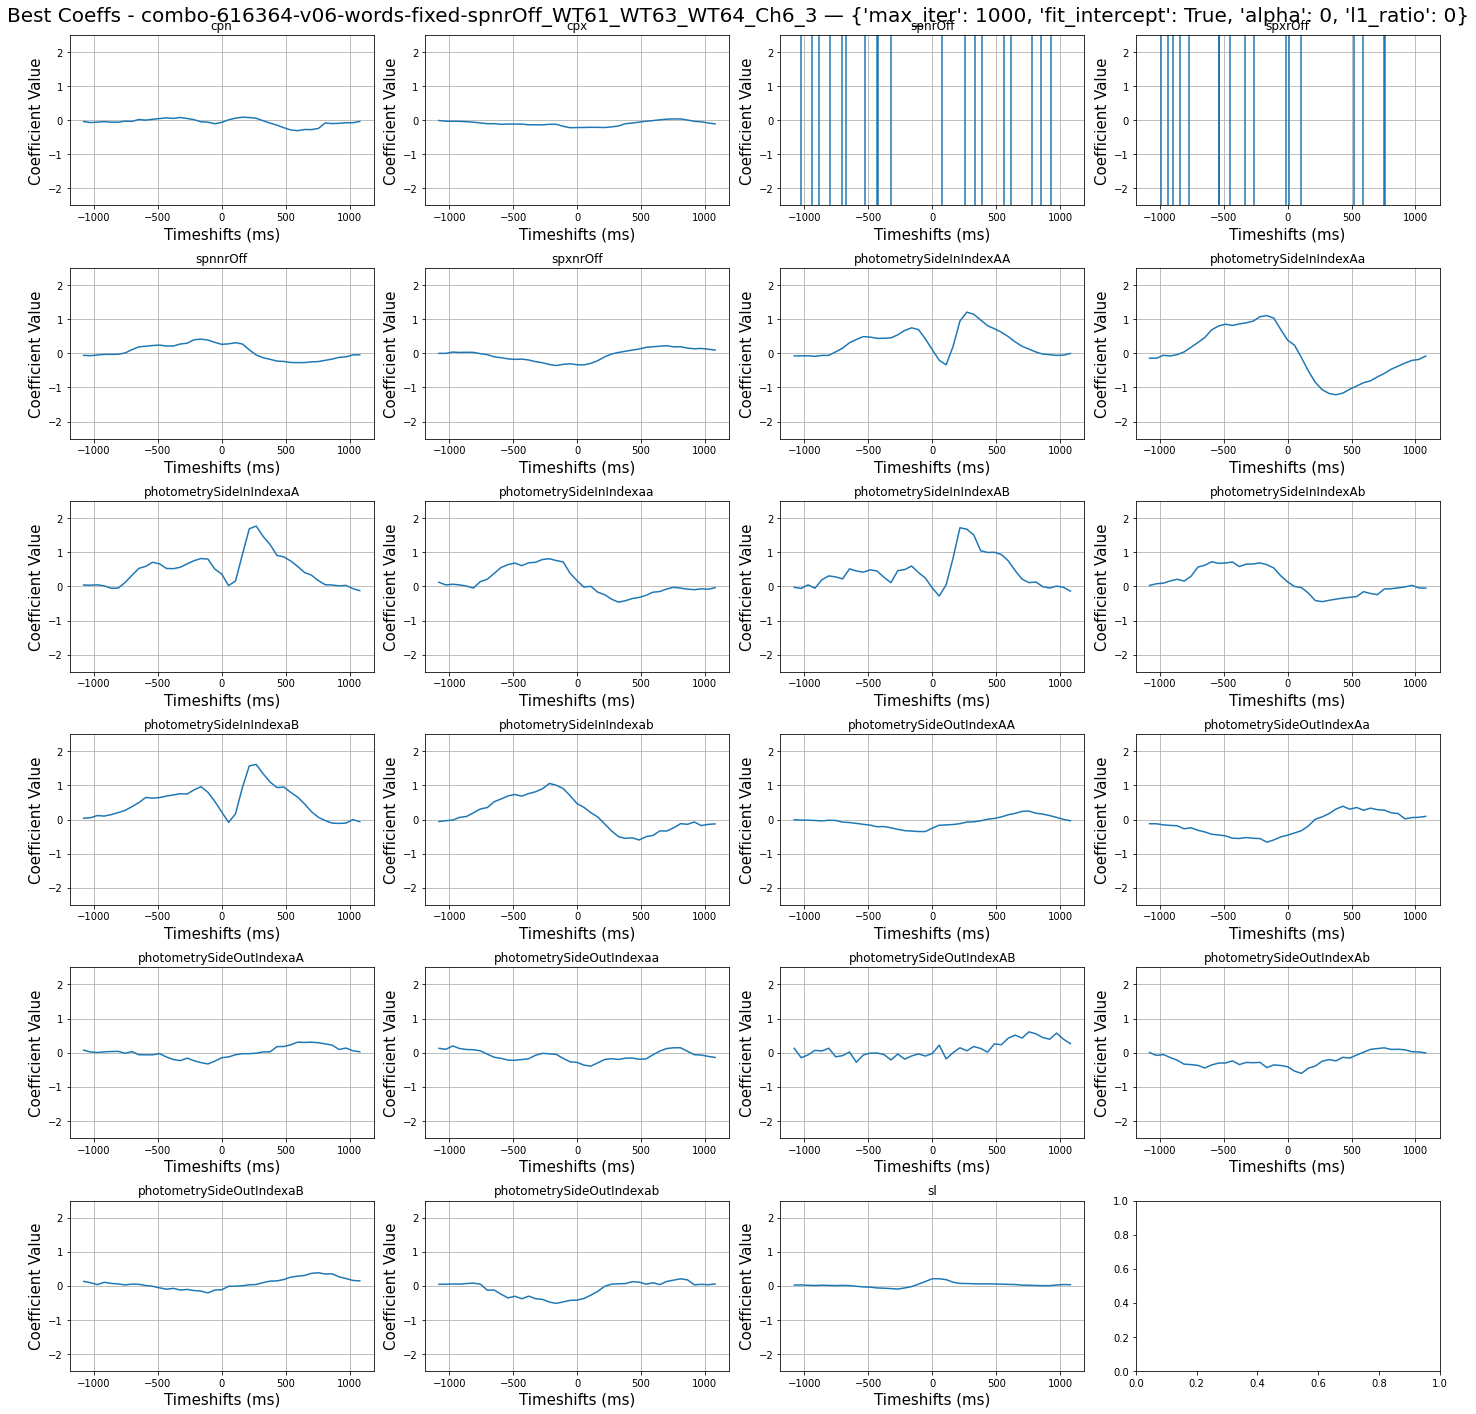

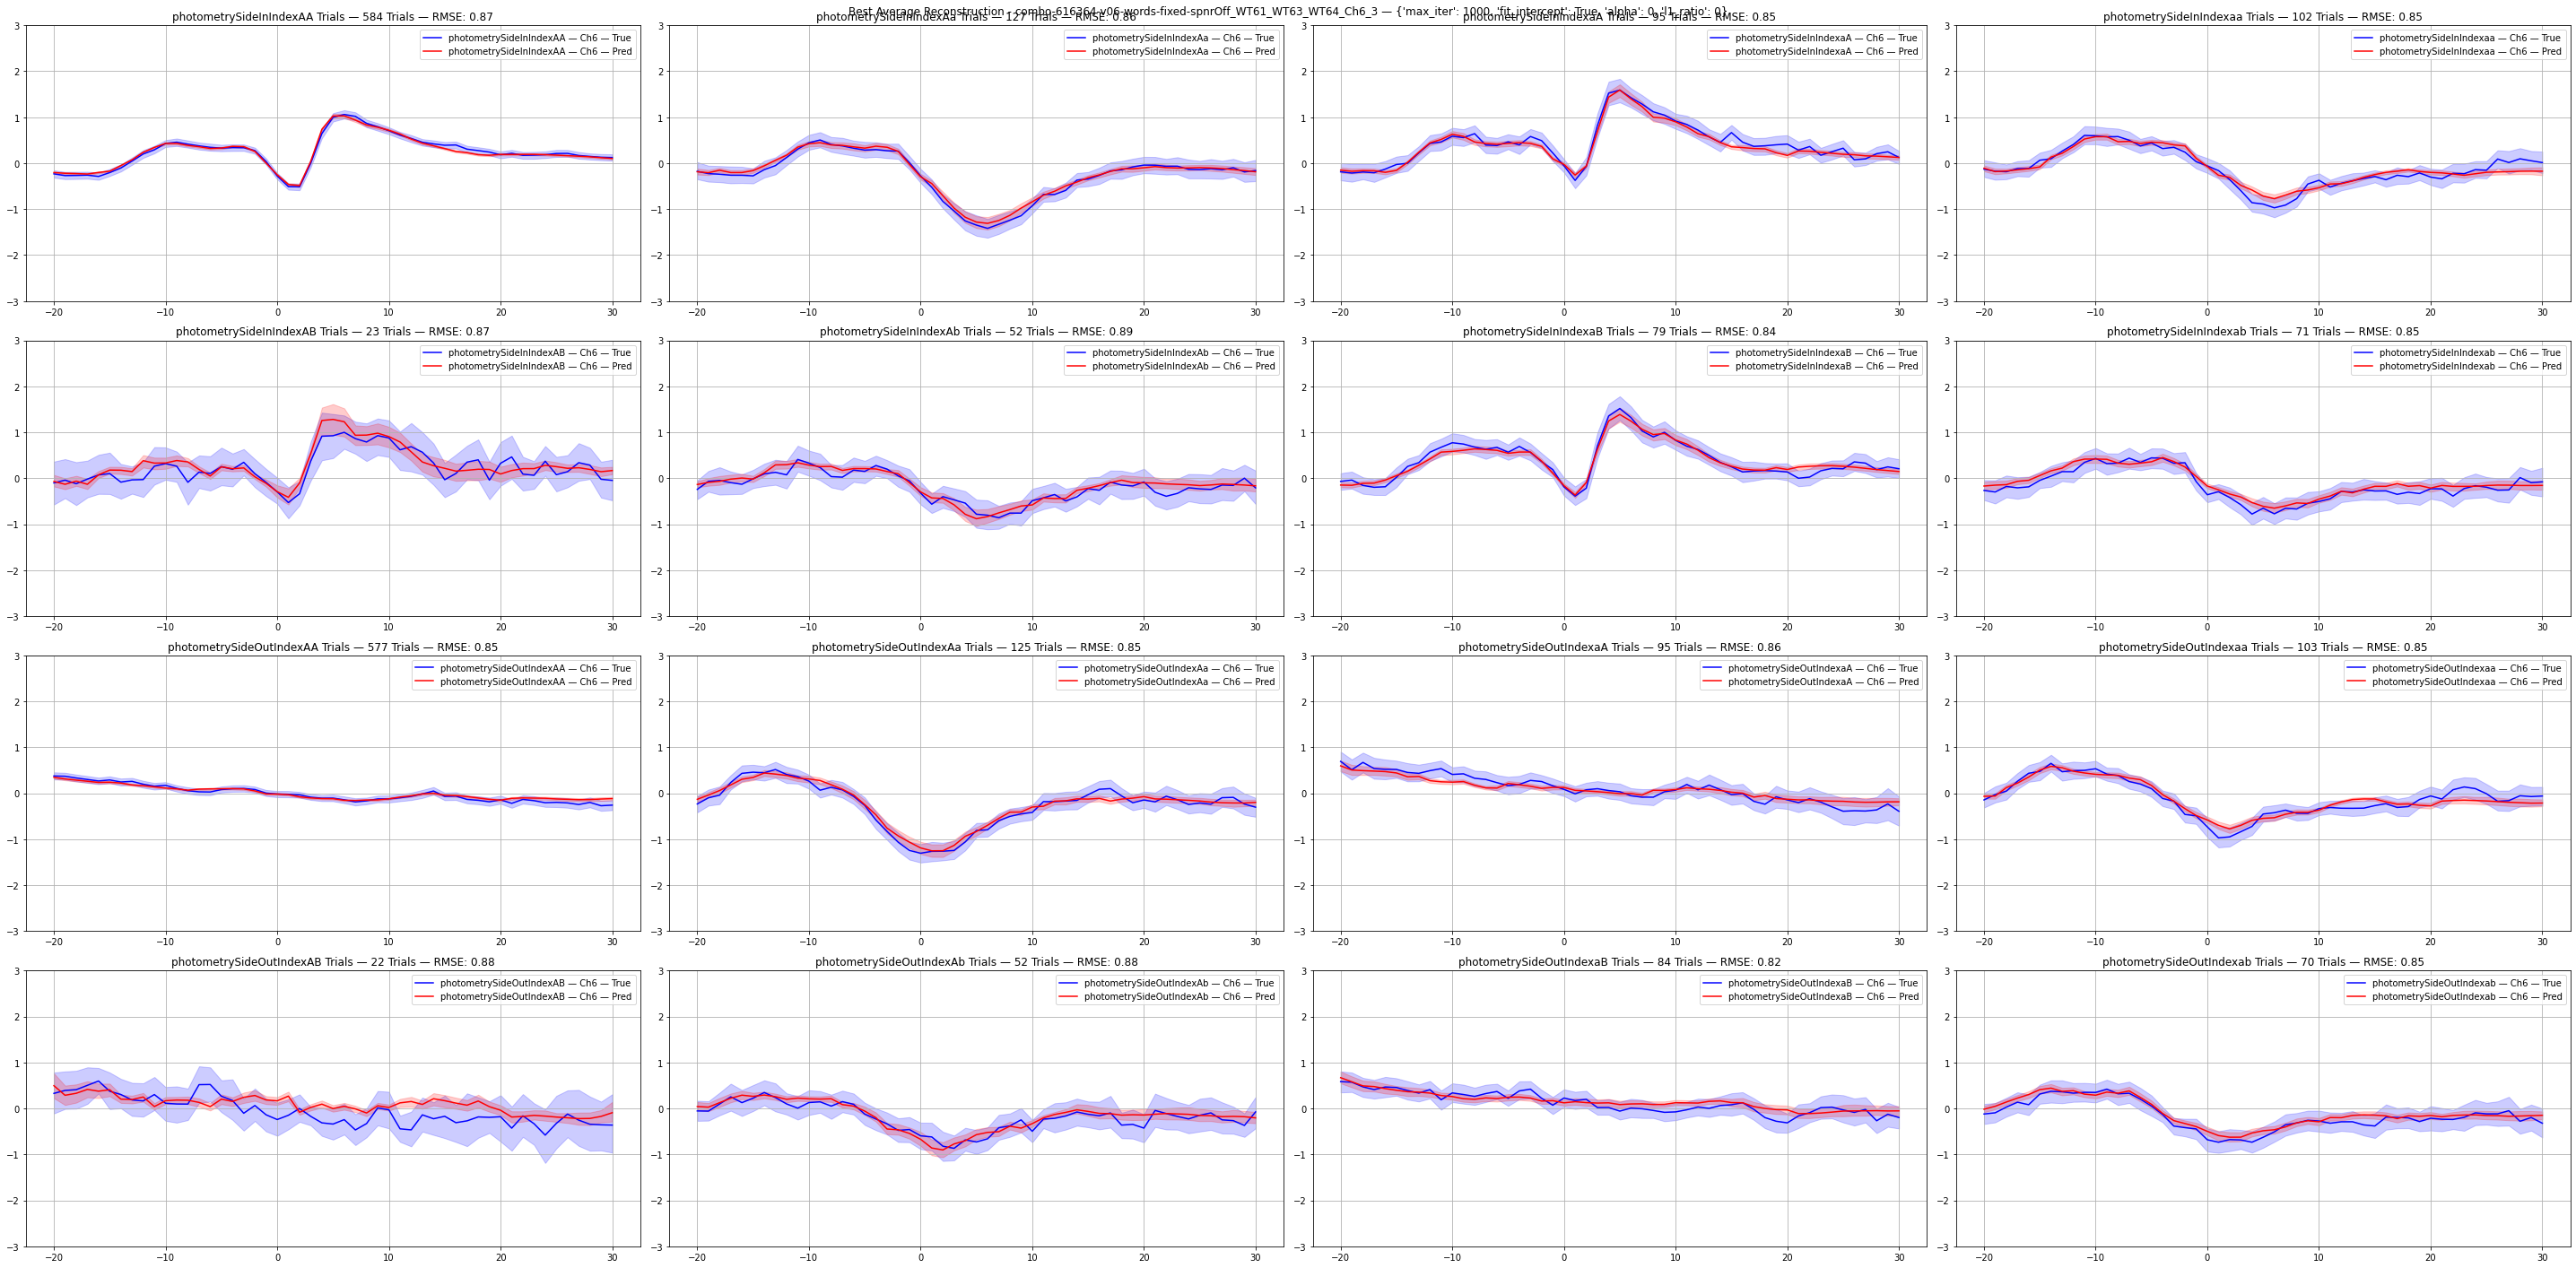

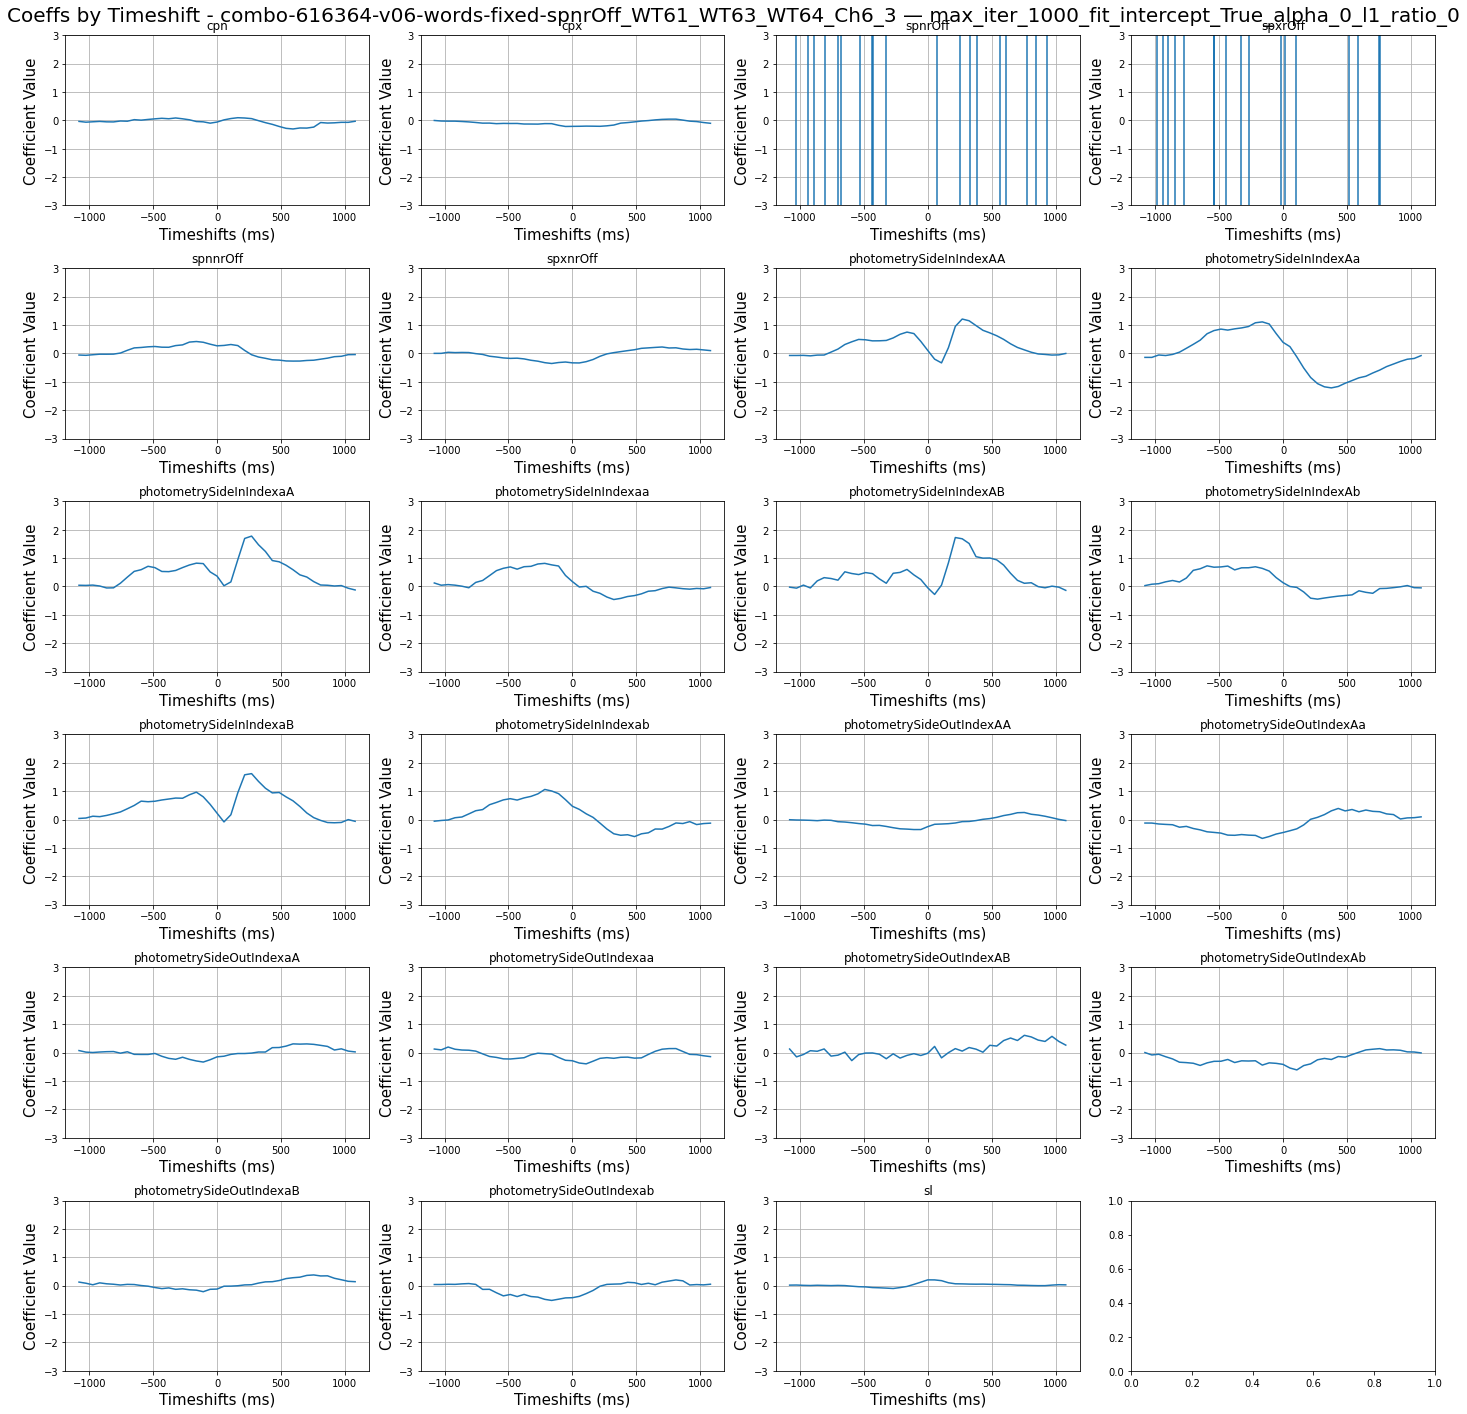

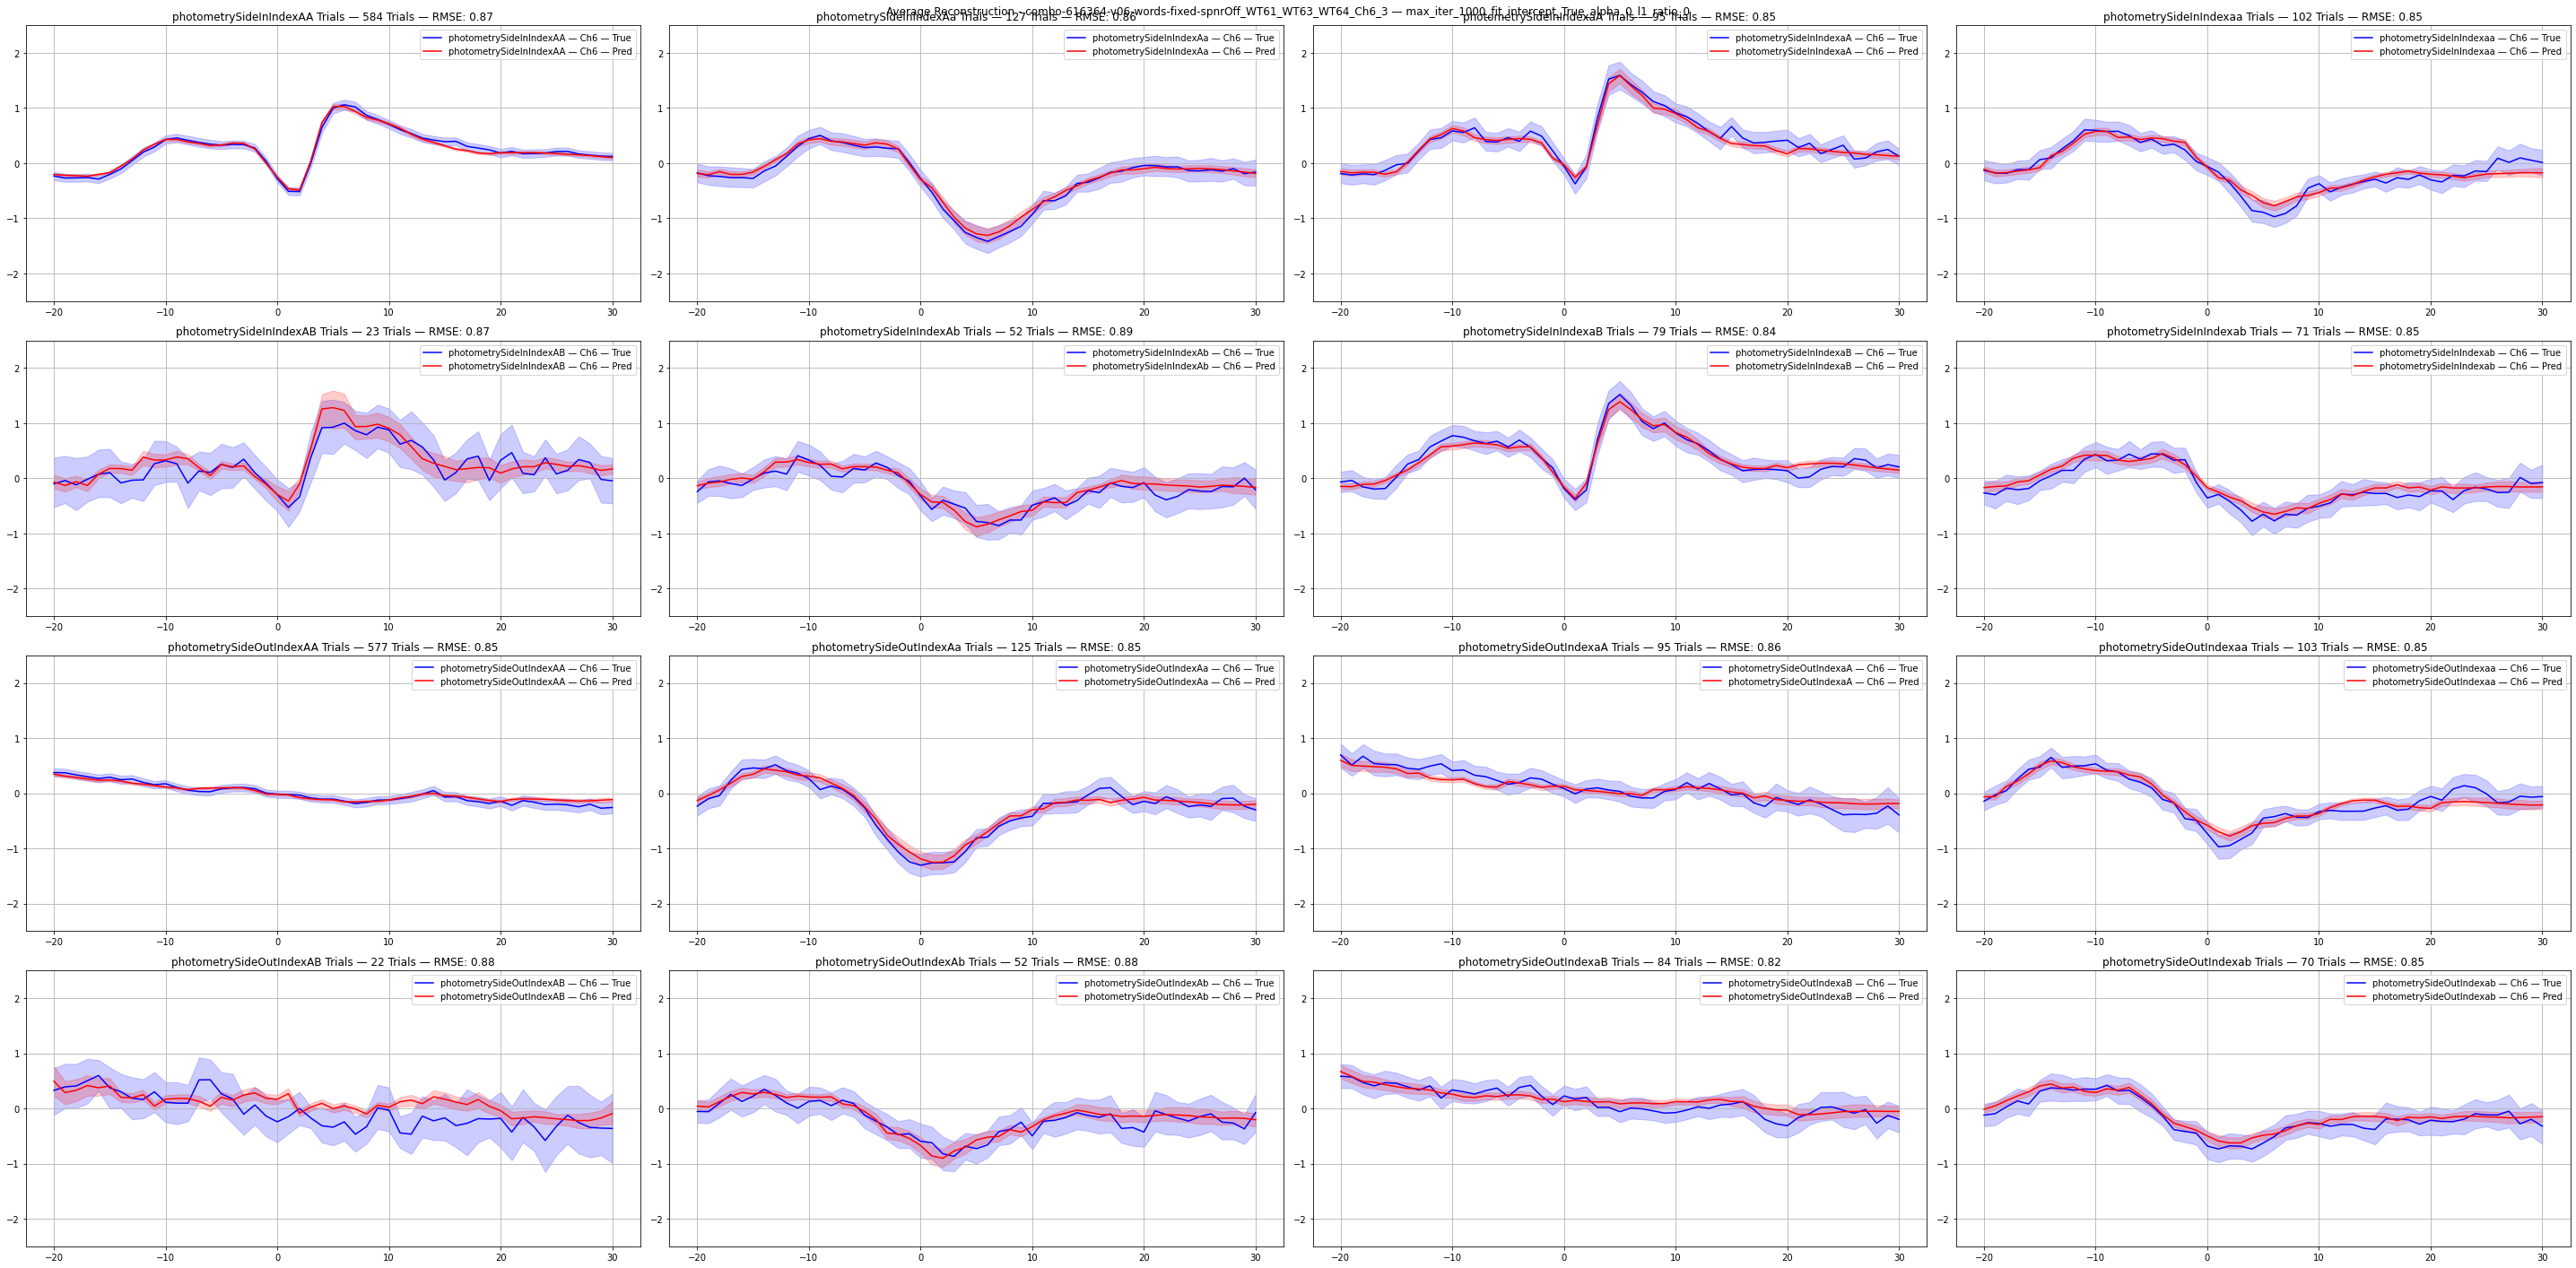

In [7]:
start = time.time()

results_dict = {}

for file_num in range(len(combo_dfs)):


    # Load Table Data
    signal_df = combo_dfs[file_num].copy()
    signal_fn = combo_fns[file_num]

    dfrel_basis = signal_df

    signal_filename_out = 'FINAL_' + signal_fn.split('/')[-1].replace('GLM_SIGNALS_INTERIM_', '').replace('txt', 'csv') + '.csv'
    print(signal_filename_out)
    
    for iXyd, X_y_dct in enumerate(X_y_pairings):
        dfrel = dfrel_basis.copy()

        X_cols_basis = X_y_dct['X_cols']
        y_col = X_y_dct['y_col']
        fn = signal_fn.split('.')[0].split('/')[-1]
        run_id = f'{prefix}_{fn}_{y_col}_{iXyd}'

        X_cols_sftd_basis = bf.col_shift_bounds_dict_to_col_list(X_cols_basis, X_cols_sftd)

        #### Revise line to reduce length / number of checks
        dfrel = dfrel[(dfrel[drop_cols_basis + X_cols_sftd_basis + [y_col]].isna().sum(axis=1) == 0)&(dfrel[y_col] != 0)]
        dfrel_setup, dfrel_holdout = models.split_data.holdout_splits(dfrel, id_cols=['nTrial'], perc_holdout=pholdout)
        dfrel_setup, dfrel_holdout = dfrel_setup.copy(), dfrel_holdout.copy()

        # Generate cross-validation (technically, group / shuffle split) sets for training / model selection
        kfold_cv_idx = models.split_data.cv_idx_by_trial_id(dfrel_setup, trial_id_columns=['nTrial'], num_folds=folds, test_size=pgss)

        prediction_X_cols = [_ for _ in X_cols_basis if _ not in ['nTrial']]
        prediction_X_cols_sftd = [_ for _ in X_cols_sftd_basis if _ not in ['nTrial']]
        
        X_setup, y_setup, X_setup_noiti, y_setup_noiti = train_model.get_xy_all_noniti(dfrel_setup, prediction_X_cols_sftd, y_col, noniticol='wi_trial_keep')
        X_holdout_witi, y_holdout_witi, X_holdout_noiti, y_holdout_noiti = train_model.get_xy_all_noniti(dfrel_holdout, prediction_X_cols_sftd, y_col, noniticol='wi_trial_keep')

        best_score, best_score_std, best_params, best_model, cv_results = models.sglm_cv.simple_cv_fit(X_setup, y_setup, kfold_cv_idx, glm_kwarg_lst, model_type='Normal', verbose=0, score_method=score_method)        
        
        
        
        
        
        
        
        eval.print_best_model_info(X_setup, best_score, best_params, best_model, start)
        glm, holdout_score, holdout_neg_mse_score = eval.training_fit_holdout_score(X_setup, y_setup, X_holdout_noiti, y_holdout_noiti, best_params)

        dfrel['pred'] = glm.predict(dfrel[prediction_X_cols_sftd])
        dfrel_setup['pred'] = glm.predict(dfrel_setup[prediction_X_cols_sftd])
        dfrel_holdout['pred'] = glm.predict(dfrel_holdout[prediction_X_cols_sftd])

        # Collect
        results_dict[f'{run_id}'] = {'holdout_score':holdout_score,
                                    'holdout_neg_mse_score':holdout_neg_mse_score,
                                    'best_score':best_score,
                                    'best_params':best_params,
                                    'all_models':sorted([(_['cv_R2_score'],
                                                            _['cv_mse_score'],
                                                            eval.calc_l1(_['cv_coefs']),
                                                            eval.calc_l2(_['cv_coefs']),
                                                            _['glm_kwargs']) for _ in cv_results['full_cv_results']], key=lambda x: -x[0])
                                    }
        print(f'Holdout Score: {holdout_score}')

        # Generate and save plots of the beta coefficients
        X_cols_plot = prediction_X_cols
        X_cols_sftd_plot = prediction_X_cols_sftd
        
        holdout_score_rnd = np.round(holdout_score, 4)
        best_beta_fn = f'{best_coeffs_folder}/{run_id}_best_{all_betas_basename}_R2_{holdout_score_rnd}.png'


        

        visualize.plot_all_beta_coefs(glm.coef_, X_cols_plot,
                                        X_cols_sftd_plot,
                                        plot_width=4,
                                        y_lims=(-2.5, 2.5),
                                        binsize=54,
                                        filename=best_beta_fn,
                                        plot_name=f'Best Coeffs - {run_id} — {best_params}'
                                        )
        
        best_beta_fn = f'{best_reconstruct_folder}/{run_id}_best_{avg_reconstruct_basename}_R2_{holdout_score_rnd}.png'


        visualize.plot_avg_reconstructions_v2(dfrel_holdout,
                                    channel=y_col,
                                    binsize = 54,
                                    plot_width=4,
                                    min_time = -20,
                                    max_time = 30,
                                    min_signal = -3.0,
                                    max_signal = 3.0,
                                    file_name=best_beta_fn,
                                    title=f'Best Average Reconstruction - {run_id} — {best_params}'
                                    )

        for fitted_model_dict in (cv_results['full_cv_results']):
            fitted_model = fitted_model_dict['model']
            kwarg_info = "_".join([f"{_k}_{fitted_model_dict['glm_kwargs'][_k]}" for _k in fitted_model_dict["glm_kwargs"]])

            model_coef = fitted_model.coef_
            model_intercept = fitted_model.intercept_

            std_name = f'{run_id}_{kwarg_info}'
            np.save(f'{all_models_folder}/coeffs/{std_name}_{model_c_basename}.npy', model_coef)
            np.save(f'{all_models_folder}/intercepts/{std_name}_{model_i_basename}.npy', model_intercept)
            
            tmp_holdout_score = fitted_model.r2_score(X_holdout_noiti, y_holdout_noiti)
            holdout_score_rnd = np.round(tmp_holdout_score, 4)
            

            visualize.plot_all_beta_coefs(fitted_model.coef_, X_cols_plot,
                                            X_cols_sftd_plot,
                                            plot_width=4,
                                            y_lims=(-3.0, 3.0),
                                            # filename=f'{fn}_coeffs.png',
                                            binsize=54,
                                            filename=f'{all_coeffs_folder}/{std_name}_{all_betas_basename}_R2_{holdout_score_rnd}.png',
                                            plot_name=f'Coeffs by Timeshift - {run_id} — {kwarg_info}'
                                            # plot_name=f'{fn} — {y_col} — {kwarg_info}'
                                            )


            visualize.plot_avg_reconstructions_v2(dfrel_holdout,
            # visualize.plot_avg_reconstructions_v2(dfrel,
                                            channel=y_col,
                                            plot_width=4,
                                            binsize = 54,
                                            min_time = -20,
                                            max_time = 30,
                                            min_signal = -2.5,
                                            max_signal = 2.5,
                                            file_name=f'{all_reconstruct_folder}/{std_name}_{avg_reconstruct_basename}_R2_{holdout_score_rnd}.png',
                                            title=f'Average Reconstruction - {run_id} — {kwarg_info}'
                                        )



In [20]:
dfrel2 = combo_dfs[0].reset_index().copy()

In [21]:
dfrel2['spxrOff'].sum(), dfrel2['spxrOff'].idxmax()

(0, 0)

In [10]:
dfrel2

index      gACH       rDA       Ch5       Ch6      GP_1      GP_2  \
0        1188 -0.438641  0.715177  0.182045 -0.664591  0.479223 -0.302199   
1        1189 -0.032796  0.320106  0.219059 -0.444329  1.287803  1.273076   
2        1190  2.242900 -0.085687  2.424495 -0.958702  0.474408  0.329895   
3        1191  4.453034 -0.024529  3.801301 -0.861778 -0.243058 -0.146284   
4        1192  3.714360  0.622959  2.749453 -0.827633 -0.854902 -0.661998   
...       ...       ...       ...       ...       ...       ...       ...   
535106  25487 -0.251033       NaN  0.508138 -0.905004  0.000000  0.000000   
535107  25488  0.008241       NaN  0.836369 -0.527499  0.000000  0.000000   
535108  25489 -2.290787       NaN  0.765532 -1.053447  0.000000  0.000000   
535109  25490 -2.016923       NaN  0.933182 -0.786774  0.000000  0.000000   
535110  25491 -1.779969       NaN  1.543420 -2.954945  0.000000  0.000000   

            GP_5      GP_6     SGP_1  ...  sl_16  sl_17  sl_18  sl_19  sl_20  \
0      -0.013769  0.769127  0.479223  ...    0.0    0.0    0.0    0.0    0.0   
1       0.459245  0.661575  1.287803  ...    0.0    0.0    0.0    0.0    0.0   
2       1.009729  1.270404  0.474408  ...    0.0    0.0    0.0    0.0    0.0   
3       0.686891  0.295559 -0.243058  ...    0.0    0.0    0.0    0.0    0.0   
4       0.686797 -0.156841 -0.854902  ...    0.0    0.0    0.0    0.0    0.0   
...          ...       ...       ...  ...    ...    ...    ...    ...    ...   
535106  0.000000  0.000000  0.000000  ...    0.0    0.0    0.0    0.0    0.0   
535107  0.000000  0.000000  0.000000  ...    0.0    0.0    0.0    0.0    0.0   
535108  0.000000  0.000000  0.000000  ...    0.0    0.0    0.0    0.0    0.0   
535109  0.000000  0.000000  0.000000  ...    0.0    0.0    0.0    0.0    0.0   
535110  0.000000  0.000000  0.000000  ...    0.0    0.0    0.0    0.0    0.0   

           empty  gDA.1  nTrial_filenum  nEndTrial_filenum      pred  
0            NaN    NaN               1                  0  0.497959  
1            NaN    NaN               1                  0  0.203336  
2            NaN    NaN               1                  0 -0.054253  
3            NaN    NaN               1                  0 -0.281050  
4            NaN    NaN               1                  0 -0.388513  
...          ...    ...             ...                ...       ...  
535106 -0.946260    NaN           16243              16243 -0.142189  
535107  2.503543    NaN           16243              16243 -0.072972  
535108  0.372708    NaN           16243              16243 -0.186420  
535109 -1.379343    NaN           16243              16243 -0.126273  
535110  0.560414    NaN           16243              16243 -0.063523  

[535111 rows x 1074 columns]

In [11]:
with pd.option_context('max_columns', 1000):
    display(dfrel2.loc[1320:1360][['index', 'gACH', 'rDA', 'Ch5', 'Ch6', 'GP_1', 'GP_2', 'GP_5', 'GP_6', 'SGP_1', 'SGP_2', 'SGP_5', 'SGP_6', 'cpo', 'cpn', 'cpx', 'rpo', 'rpn', 'rpx', 'rl', 'lpo', 'lpn', 'lpx', 'll', 'r', 'nr', 'photometryCenterInIndex', 'photometryCenterInIndexr', 'photometryCenterInIndexnr', 'photometryCenterOutIndex', 'photometryCenterOutIndexr', 'photometryCenterOutIndexnr', 'photometrySideInIndex', 'photometrySideInIndexr', 'photometrySideInIndexnr', 'photometrySideInIndexAA', 'photometrySideInIndexAa', 'photometrySideInIndexaA', 'photometrySideInIndexaa', 'photometrySideInIndexAB', 'photometrySideInIndexAb', 'photometrySideInIndexaB', 'photometrySideInIndexab', 'photometrySideOutIndex', 'photometrySideOutIndexr', 'photometrySideOutIndexnr', 'photometrySideOutIndexAA', 'photometrySideOutIndexAa', 'photometrySideOutIndexaA', 'photometrySideOutIndexaa', 'photometrySideOutIndexAB', 'photometrySideOutIndexAb', 'photometrySideOutIndexaB', 'photometrySideOutIndexab', 'photometryFirstLickIndex', 'photometryFirstLickIndexr', 'photometryFirstLickIndexnr', 'nTrial', 'nEndTrial', 'wi_trial_keep', 'gACH.1', 'rDA.1', 'gDA', 'r_trial', 'nr_trial', 'rpxr', 'rpxnr', 'lpxr', 'lpxnr', 'rpnr', 'rpnnr', 'lpnr', 'lpnnr', 'spn', 'spx', 'spnr', 'spnnr', 'spxr', 'spxnr', 'sl', 'spnrOff', 'spnnrOff', 'spxrOff', 'spxnrOff', 'file_num']])

index      gACH       rDA       Ch5       Ch6      GP_1      GP_2  \
1320   2508 -0.924457  1.263007  0.221867  2.127405 -0.935942  0.050665   
1321   2509 -0.909706  1.088598  0.305250  1.786271 -0.644016 -0.222696   
1322   2510  0.007889  1.511545  0.171589  1.422406 -0.612606 -0.591816   
1323   2511 -0.491272  1.360903 -0.479821  1.938268 -0.169835  0.101884   
1324   2512 -0.079855  1.843508 -0.607981  1.823721  0.121224 -0.937716   
1325   2513 -0.704138  2.155104 -0.238982  2.134285 -0.921894 -1.031509   
1326   2514 -0.899295  1.416061 -1.140831  2.412603 -0.768485 -0.795867   
1327   2515 -1.126523  1.906370 -1.741451  2.083438 -1.410393 -1.893869   
1328   2516 -1.428556  1.745578 -1.384193  2.024569 -1.666913 -1.376091   
1329   2517 -1.686616  0.700012 -1.494869  1.674120 -0.888117 -1.844842   
1330   2518 -1.641329 -0.063658 -0.900089  1.238317 -0.436693 -1.611542   
1331   2519  0.299110 -0.083245  0.039485  0.091565  0.386777 -0.942350   
1332   2520 -0.442577  0.110083 -0.083023  0.391789  0.674523  0.069868   
1333   2521 -0.939583  0.711587 -0.862130  0.279425  0.917097  1.201189   
1334   2522 -0.340696  0.349373  0.404494  0.805245 -0.196810  0.780749   
1335   2523  0.193330 -0.038560 -0.801918  0.593179 -1.111820  0.631961   
1336   2524 -0.041523 -0.070604  0.063374  0.988760 -1.095642  0.078821   
1337   2525 -0.743243  0.205623 -1.032484  0.300722 -0.015640 -1.073220   
1338   2526 -0.958993 -0.150173 -1.301003 -0.107443  1.096860 -0.006168   
1339   2527 -1.563671 -0.951459 -1.508894 -0.039023  1.819154  0.936723   
1340   2528 -1.646094 -0.123936 -0.801842  0.679267  1.957381  0.419981   
1341   2529 -0.759998 -0.348151  0.390701 -0.119444  0.811365  0.289258   
1342   2530  0.466026 -0.822682  1.167354 -0.225269  0.300023  0.154932   
1343   2531  0.522560 -0.455865  0.506947 -1.097134 -0.583224  0.151925   
1344   2532  0.247468 -0.020798  0.430346  0.210584 -0.509882  0.186443   
1345   2533 -0.480818  0.499644 -0.005514 -0.350032 -0.974691 -0.212613   
1346   2534 -0.425415  0.159526 -1.041559 -0.683459 -1.023351 -0.479387   
1347   2535 -0.726428 -0.175447 -0.575896 -0.696783 -1.635069  0.805985   
1348   2536 -0.048015 -0.277779  0.141969  0.070577 -2.274218  0.131450   
1349   2537 -0.467450  0.205115 -0.144130  0.081254 -2.357317  0.802241   
1350   2538 -0.401567 -0.385431  0.045905  0.133301 -1.780163 -0.252633   
1351   2539  0.052909 -0.041146  0.739649  0.514355 -1.559298  0.190473   
1352   2540  0.489310 -0.189628  0.413059  0.310929 -1.246857 -0.605588   
1353   2541  0.386935 -0.232665  0.540312 -0.064915 -0.812825 -0.507669   
1354   2542 -0.930924 -1.000156 -0.226847 -0.119789 -0.989561 -2.210136   
1355   2543 -1.103730 -1.143449 -1.798679 -0.127011 -1.279528 -1.177564   
1356   2544 -1.420621 -1.406277 -1.687582 -0.398207 -0.324004 -2.551562   
1357   2545 -1.280836 -1.582676 -1.310923 -1.635828 -0.116321 -2.193110   
1358   2546 -1.251451 -1.987601 -0.885696 -2.008928  0.474813 -1.924538   
1359   2547 -1.272204 -1.552890 -0.402866 -1.612445  0.569100 -1.062370   
1360   2548 -0.846997 -1.441901  0.055965 -0.772091  0.698043 -0.906190   

          GP_5      GP_6     SGP_1     SGP_2     SGP_5     SGP_6  cpo  cpn  \
1320 -0.028788  0.376499 -0.935942  0.050665 -0.028788  0.376499    0    0   
1321 -0.183409 -0.862368 -0.644016 -0.222696 -0.183409 -0.862368    0    0   
1322  0.020943 -0.577149 -0.612606 -0.591816  0.020943 -0.577149    0    0   
1323  0.300483 -1.166327 -0.169835  0.101884  0.300483 -1.166327    0    0   
1324  0.357198 -1.426587  0.121224 -0.937716  0.357198 -1.426587    0    0   
1325 -1.220957 -1.730814 -0.921894 -1.031509 -1.220957 -1.730814    0    0   
1326 -0.050108 -2.479815 -0.768485 -0.795867 -0.050108 -2.479815    0    0   
1327 -0.379183 -0.802861 -1.410393 -1.893869 -0.379183 -0.802861    0    0   
1328  0.362990 -1.765664 -1.666913 -1.376091  0.362990 -1.765664    0    0   
1329  0.481341 -1.086897 -0.888117 -1.844842  0.481341 -1.086897    0    0 

In [12]:
# print(list(dfrel2.columns))

In [13]:
# dfrel.to_csv(signal_path_out)

In [14]:
# Select predictors X
# Select response y
# Timeshift X
# Drop all drop_cols_basis nans, shifted x col nans, y col nans, and y columns without information (i.e. 0s)
# 
# 
# 




In [15]:
dfrel, X_cols_sftd = lpp.timeshift_vals(dfrel, X_cols, neg_order=neg_order, pos_order=pos_order)

dfrel = dfrel[(dfrel[drop_cols_basis + X_cols_sftd + [y_col]].isna().sum(axis=1) == 0)&(dfrel[y_col] != 0)]
# dfrel = dfrel.dropna()
dfrel_setup, dfrel_holdout = holdout_splits(dfrel,
                                            id_cols=['nTrial'],
                                            perc_holdout=pholdout)
dfrel_setup, dfrel_holdout = dfrel_setup.copy(), dfrel_holdout.copy()

# Generate cross-validation (technically, group / shuffle split) sets for training / model selection
kfold_cv_idx = sglm_ez.cv_idx_by_trial_id(dfrel_setup,
                                        trial_id_columns=['nTrial'],
                                        num_folds=folds,
                                        test_size=pgss)

prediction_X_cols = [_ for _ in X_cols if _ not in ['nTrial']]
prediction_X_cols_sftd = [_ for _ in X_cols_sftd if _ not in ['nTrial']]

X_setup = get_x(dfrel_setup, prediction_X_cols_sftd, keep_rows=None)
y_setup = get_y(dfrel_setup, y_col, keep_rows=None)
X_setup_noiti = get_x(dfrel_setup, prediction_X_cols_sftd, keep_rows=dfrel_setup['wi_trial_keep'])
y_setup_noiti = get_y(dfrel_setup, y_col, keep_rows=dfrel_setup['wi_trial_keep'])
best_score, best_score_std, best_params, best_model, cv_results = sglm_ez.simple_cv_fit(X_setup, y_setup, kfold_cv_idx, glm_kwarg_lst, model_type='Normal', verbose=0, score_method=score_method)

sglm_ez.print_best_model_info(X_setup, best_score, best_params, best_model, start)

X_holdout_witi = get_x(dfrel_holdout, prediction_X_cols_sftd, keep_rows=None)
y_holdout_witi = get_y(dfrel_holdout, y_col, keep_rows=None)
X_holdout_noiti = get_x(dfrel_holdout, prediction_X_cols_sftd, keep_rows=dfrel_holdout['wi_trial_keep'])
y_holdout_noiti = get_y(dfrel_holdout, y_col, keep_rows=dfrel_holdout['wi_trial_keep'])
glm, holdout_score, holdout_neg_mse_score = sglm_ez.training_fit_holdout_score(X_setup, y_setup, X_holdout_noiti, y_holdout_noiti, best_params)

dfrel['pred'] = glm.predict(dfrel[prediction_X_cols_sftd])
dfrel_setup['pred'] = glm.predict(dfrel_setup[prediction_X_cols_sftd])
dfrel_holdout['pred'] = glm.predict(dfrel_holdout[prediction_X_cols_sftd])

# Collect
results_dict[f'{run_id}'] = {'holdout_score':holdout_score,
                            'holdout_neg_mse_score':holdout_neg_mse_score,
                            'best_score':best_score,
                            'best_params':best_params,
                            'all_models':sorted([(_['cv_R2_score'],
                                                    _['cv_mse_score'],
                                                    sglm_ez.calc_l1(_['cv_coefs']),
                                                    sglm_ez.calc_l2(_['cv_coefs']),
                                                    _['glm_kwargs']) for _ in cv_results['full_cv_results']], key=lambda x: -x[0])
                            }
print(f'Holdout Score: {holdout_score}')

# Generate and save plots of the beta coefficients
X_cols_plot = prediction_X_cols
X_cols_sftd_plot = prediction_X_cols_sftd

holdout_score_rnd = np.round(holdout_score, 4)
best_beta_fn = f'{best_coeffs_folder}/{run_id}_best_{all_betas_basename}_R2_{holdout_score_rnd}.png'
visualize.plot_all_beta_coefs(glm.coef_, X_cols_plot,
                                X_cols_sftd_plot,
                                plot_width=4,
                                # plot_width=2,
                                y_lims=(-2.5, 2.5),
                                # filename=f'{fn}_coeffs.png',
                                binsize=54,
                                filename=best_beta_fn,
                                plot_name=f'Best Coeffs - {run_id} — {best_params}'
                                )

best_beta_fn = f'{best_reconstruct_folder}/{run_id}_best_{avg_reconstruct_basename}_R2_{holdout_score_rnd}.png'


visualize.plot_avg_reconstructions_v2(dfrel_holdout,
# visualize.plot_avg_reconstructions_v2(dfrel,
                            channel=y_col,
                            binsize = 54,
                            plot_width=4,
                            min_time = -20,
                            max_time = 30,
                            min_signal = -3.0,
                            max_signal = 3.0,
                            file_name=best_beta_fn,
                            title=f'Best Average Reconstruction - {run_id} — {best_params}'
                            )

for fitted_model_dict in (cv_results['full_cv_results']):

SyntaxError: unexpected EOF while parsing (<ipython-input-15-07c62166a47f>, line 83)

In [ ]:

if len(leave_one_out_list) > 1:
    run_id = f'{prefix}_{fn}_{y_col}_drop={"_".join(left_out)}'
else:
    run_id = f'{prefix}_{fn}_{y_col}'

print("Run ID:", run_id)
dfrel = df.copy()


In [ ]:
X_cols_all = [
    'nTrial',
    'cpn', 'cpx',

    'spnr',
    'spxr',
    'spnnr',
    'spxnr',


    # 'photometrySideInIndexAA', 'photometrySideInIndexAa',
    # 'photometrySideInIndexaA', 'photometrySideInIndexaa',
    # 'photometrySideInIndexAB', 'photometrySideInIndexAb',
    # 'photometrySideInIndexaB', 'photometrySideInIndexab',

    # 'photometrySideOutIndexAA', 'photometrySideOutIndexAa',
    # 'photometrySideOutIndexaA', 'photometrySideOutIndexaa',
    # 'photometrySideOutIndexAB', 'photometrySideOutIndexAb',
    # 'photometrySideOutIndexaB', 'photometrySideOutIndexab',

    'sl',
]


y_col_lst_all = ['gACH', 'rDA', 'gDA', 'Ch5', 'Ch6', 'GP_1', 'GP_2', 'GP_5', 'GP_6', 'SGP_1', 'SGP_2', 'SGP_5', 'SGP_6']

# y_col_lst = ['Ch1', 'Ch2', 'Ch5', 'Ch6']
# y_col_lst = ['gACH', 'gDA', 'rDA', 'Ch5', 'Ch6']
y_col_lst = ['gACH', 'gDA', 'Ch5', 'Ch6']
# y_col_lst = ['Ch5', 'Ch6']

# Select column names to use for GLM predictors
drop_cols_basis = [
    'nTrial',
    'cpn', 'cpx',

    # 'spnr',
    # 'spxr',
    'spnnr',
    'spxnr',
    # 'sl',

    # # 'nTrial',
    # 'photometryCenterInIndex', 'photometryCenterOutIndex',
    # # 'photometrySideInIndex', 'photometrySideOutIndex',
    # 'photometrySideInIndexr', 'photometrySideOutIndexr',
    # 'photometrySideInIndexnr', 'photometrySideOutIndexnr',

    # addl columns
    'spnr', 'spxr',
    # 'spnnr', 'spxnr',


    'photometrySideInIndexAA', 'photometrySideInIndexAa',
    'photometrySideInIndexaA', 'photometrySideInIndexaa',
    'photometrySideInIndexAB', 'photometrySideInIndexAb',
    'photometrySideInIndexaB', 'photometrySideInIndexab',

    'photometrySideOutIndexAA', 'photometrySideOutIndexAa',
    'photometrySideOutIndexaA', 'photometrySideOutIndexaa',
    'photometrySideOutIndexAB', 'photometrySideOutIndexAb',
    'photometrySideOutIndexaB', 'photometrySideOutIndexab',


    'sl',
]


score_method = 'r2'        

# Select hyper parameters for GLM to use for model selection
# Step 1: Create a dictionary of lists for these relevant keywords...
kwargs_iterations = {
    'alpha': [0],
    'l1_ratio': [0],

    # 'alpha': [0.0, 0.001, 0.01, 0.1, 1.0],
    # 'l1_ratio': [0.0, 0.001],
}

# Step 2: Create a dictionary for the fixed keyword arguments that do not require iteration...
kwargs_fixed = {
    'max_iter': 1000,
    'fit_intercept': True
}

# neg_order, pos_order = -14, 14
neg_order, pos_order = -20, 20
folds = 50
pholdout = 0.2
pgss = 0.2

# Step 3: Generate iterable list of keyword sets for possible combinations
glm_kwarg_lst = sglm_cv.generate_mult_params(kwargs_iterations, kwargs_fixed)

results_dict = {}

leave_one_out_list = [[]]
# leave_one_out_list = [[]] + [[_] for _ in X_cols_all if _ != 'nTrial' and _ not in [
#     'photometrySideInIndexAA', 'photometrySideInIndexAa',
#     'photometrySideInIndexaA', 'photometrySideInIndexaa',
#     'photometrySideInIndexAB', 'photometrySideInIndexAb',
#     'photometrySideInIndexaB', 'photometrySideInIndexab',

#     'photometrySideOutIndexAA', 'photometrySideOutIndexAa',
#     'photometrySideOutIndexaA', 'photometrySideOutIndexaa',
#     'photometrySideOutIndexAB', 'photometrySideOutIndexAb',
#     'photometrySideOutIndexaB', 'photometrySideOutIndexab',]] # Excluding column for groupby, 'nTrial'
full_df_set = []


X_cols = [_ for _ in X_cols_all if _ not in left_out]

dfrel, X_cols_sftd = lpp.timeshift_vals(dfrel, X_cols, neg_order=neg_order, pos_order=pos_order)
